In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from matplotlib.ticker import MaxNLocator

In [3]:
# !!! provide your own data directory for final processed csv-tables !!!
data_dir = Path('../data/csv/')

df_characters = pd.read_csv(data_dir / 'characters.csv')
df_movies = pd.read_csv(data_dir / 'movies.csv')
df_tropes = pd.read_csv(data_dir / 'tropes.csv')

## Movies

In [4]:
import ast

def extract_genres(genre_str):
    genre_dict = ast.literal_eval(genre_str)
    return list(genre_dict.values())

df_movies['genres_list'] = df_movies['genres'].apply(extract_genres)
df_movies.head()

,wikipedia_movie_id,freebase_movie_id,name,release_date,box_office_revenue,runtime,languages,countries,genres,genres_list
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[Drama]


In total we have 81741 movies.
Movies are classified into one or multiple genres, out of a total of 363 genres.


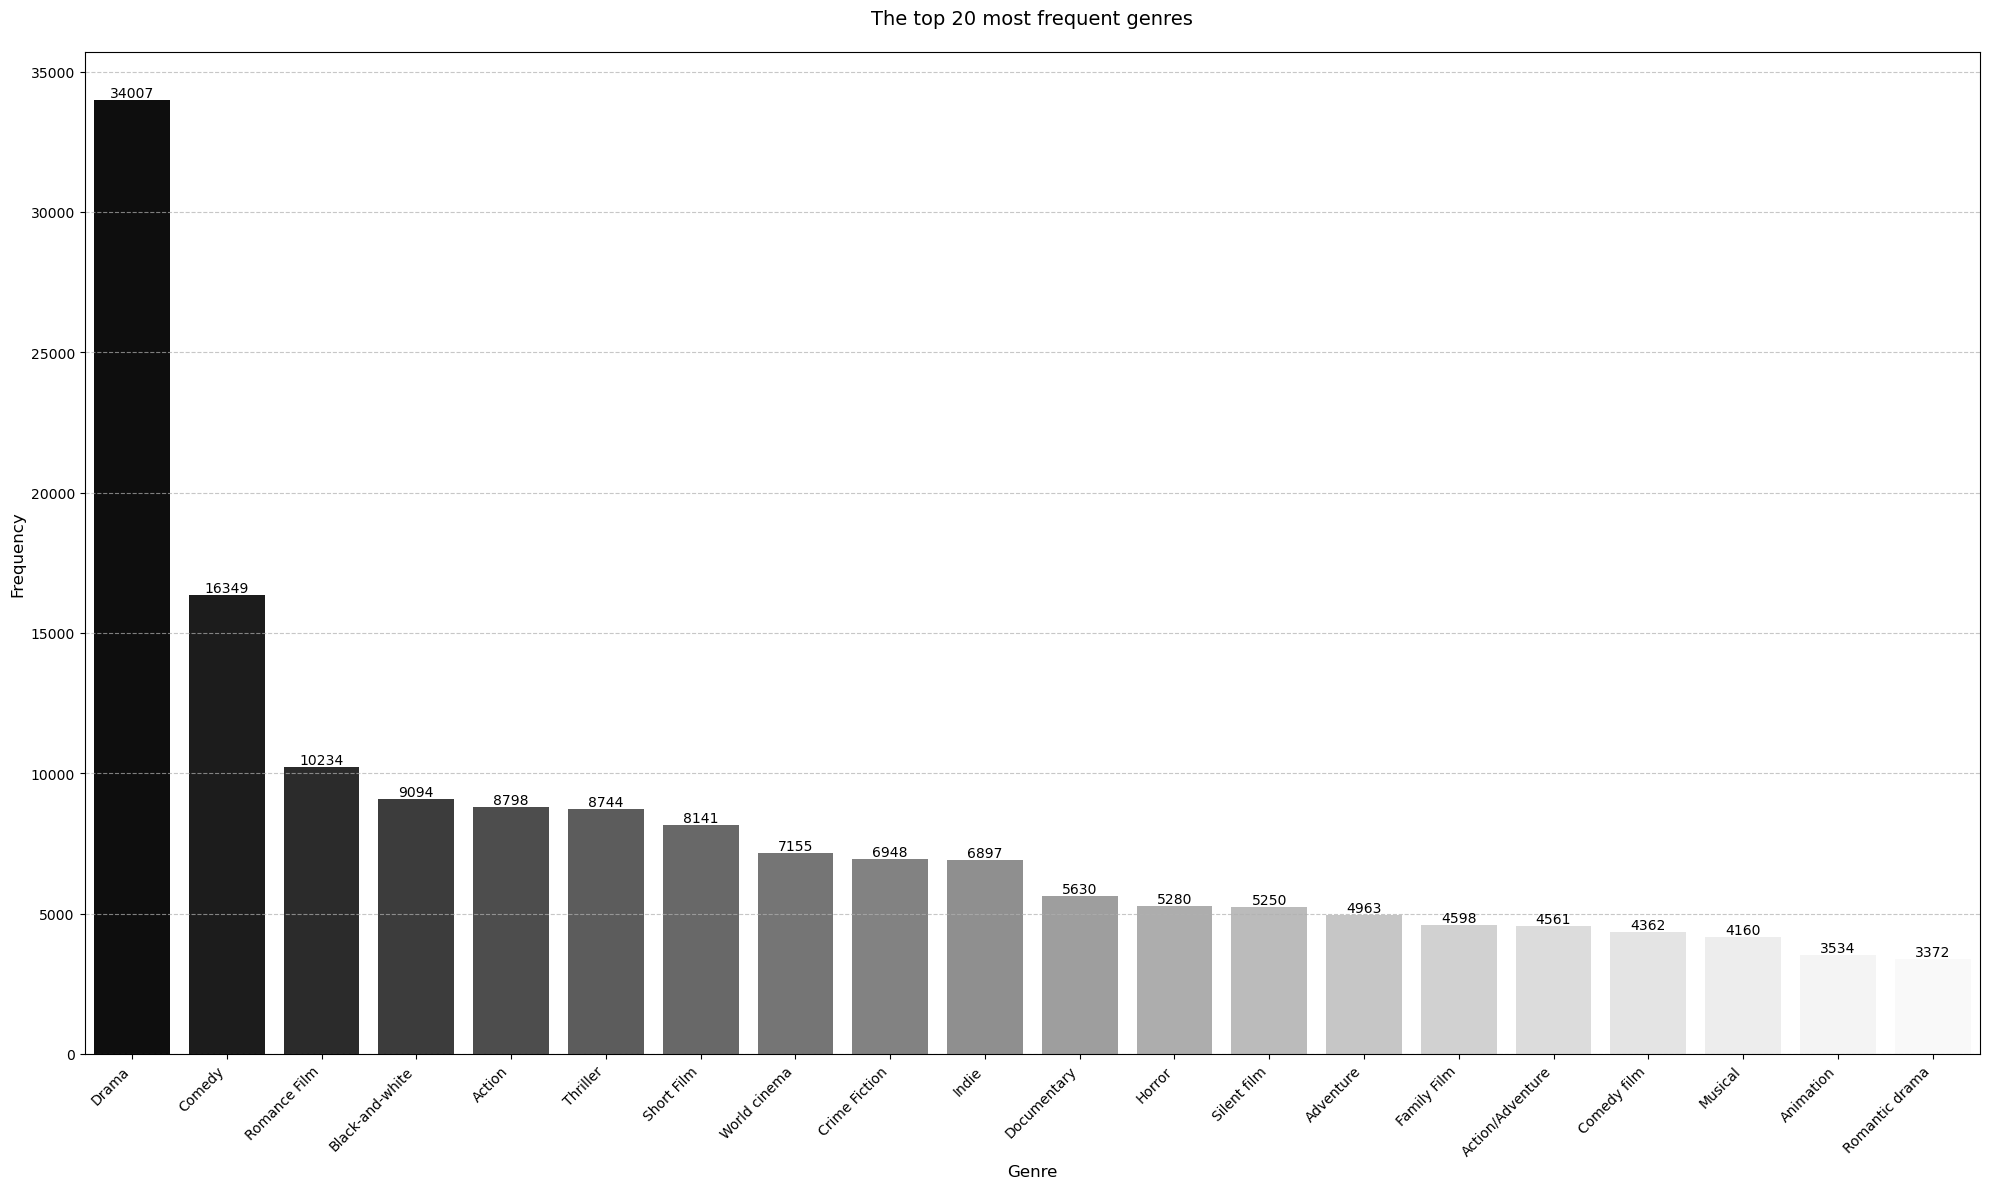


Top 10 most common genres:
    genres_list  count
          Drama  34007
         Comedy  16349
   Romance Film  10234
Black-and-white   9094
         Action   8798
       Thriller   8744
     Short Film   8141
   World cinema   7155
  Crime Fiction   6948
          Indie   6897


In [5]:
genres_freq = df_movies.genres_list.explode().value_counts().reset_index(name='count')
genres_freq = genres_freq.sort_values('count', ascending=False)

print(f"In total we have {len(df_movies)} movies.")
print(f"Movies are classified into one or multiple genres, out of a total of {len(genres_freq)} genres.")

threshold=20

plt.figure(figsize=(20, 12))

sns.barplot(
    data=genres_freq[:threshold],
    x='genres_list',
    y='count',
    palette='Greys_r'
)

plt.title(f'The top {threshold} most frequent genres', pad=20, fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(genres_freq[:threshold]['count']):
    plt.text(i, v, f'{v}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

threshold=10
print(f'\nTop {threshold} most common genres:')
print(genres_freq.head(threshold).to_string(index=False))

## Death

In [7]:
death_rate_per_movie = df_characters.groupby('wikipedia_movie_id')['died'].mean()
print(death_rate_per_movie.describe())

count    39406.000000
mean         0.173448
std          0.309097
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: died, dtype: float64


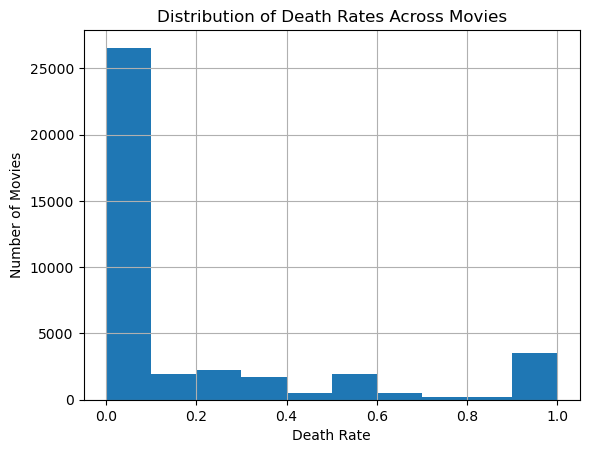

In [8]:
death_rate_per_movie.hist(bins=10)
plt.xlabel('Death Rate')
plt.ylabel('Number of Movies')
plt.title('Distribution of Death Rates Across Movies')
plt.show()

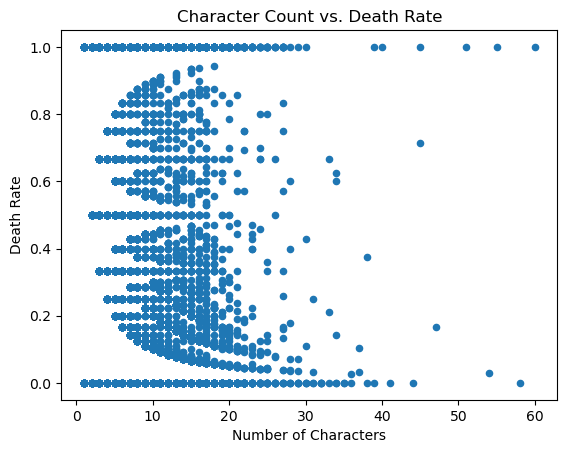

In [10]:
scatter_data = df_characters.groupby('wikipedia_movie_id').agg({'name': 'count', 'died': 'mean'})
scatter_data.plot.scatter(x='name', y='died')
plt.xlabel('Number of Characters')
plt.ylabel('Death Rate')
plt.title('Character Count vs. Death Rate')
plt.show()

## Tropes

In [6]:
df_characters.head()

,wikipedia_movie_id,name,trope_id,died,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release
0,5369062,Dr. Kobras,EVIL_OVERLORD,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5369062,Jane Dobson,DAMSEL_IN_DISTRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5369062,Tony Farms (Pumaman),RELUCTANT_HERO,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5369062,Vadinho,MENTOR,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,33663027,Kenny/Sivakumar,TRAGIC_HERO,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In total we have 190198 characters whose trope we identified while also knowing if they died in the movie.
Tropes classified into 99 tropes (1 of them being the "NO TROPE" trope).


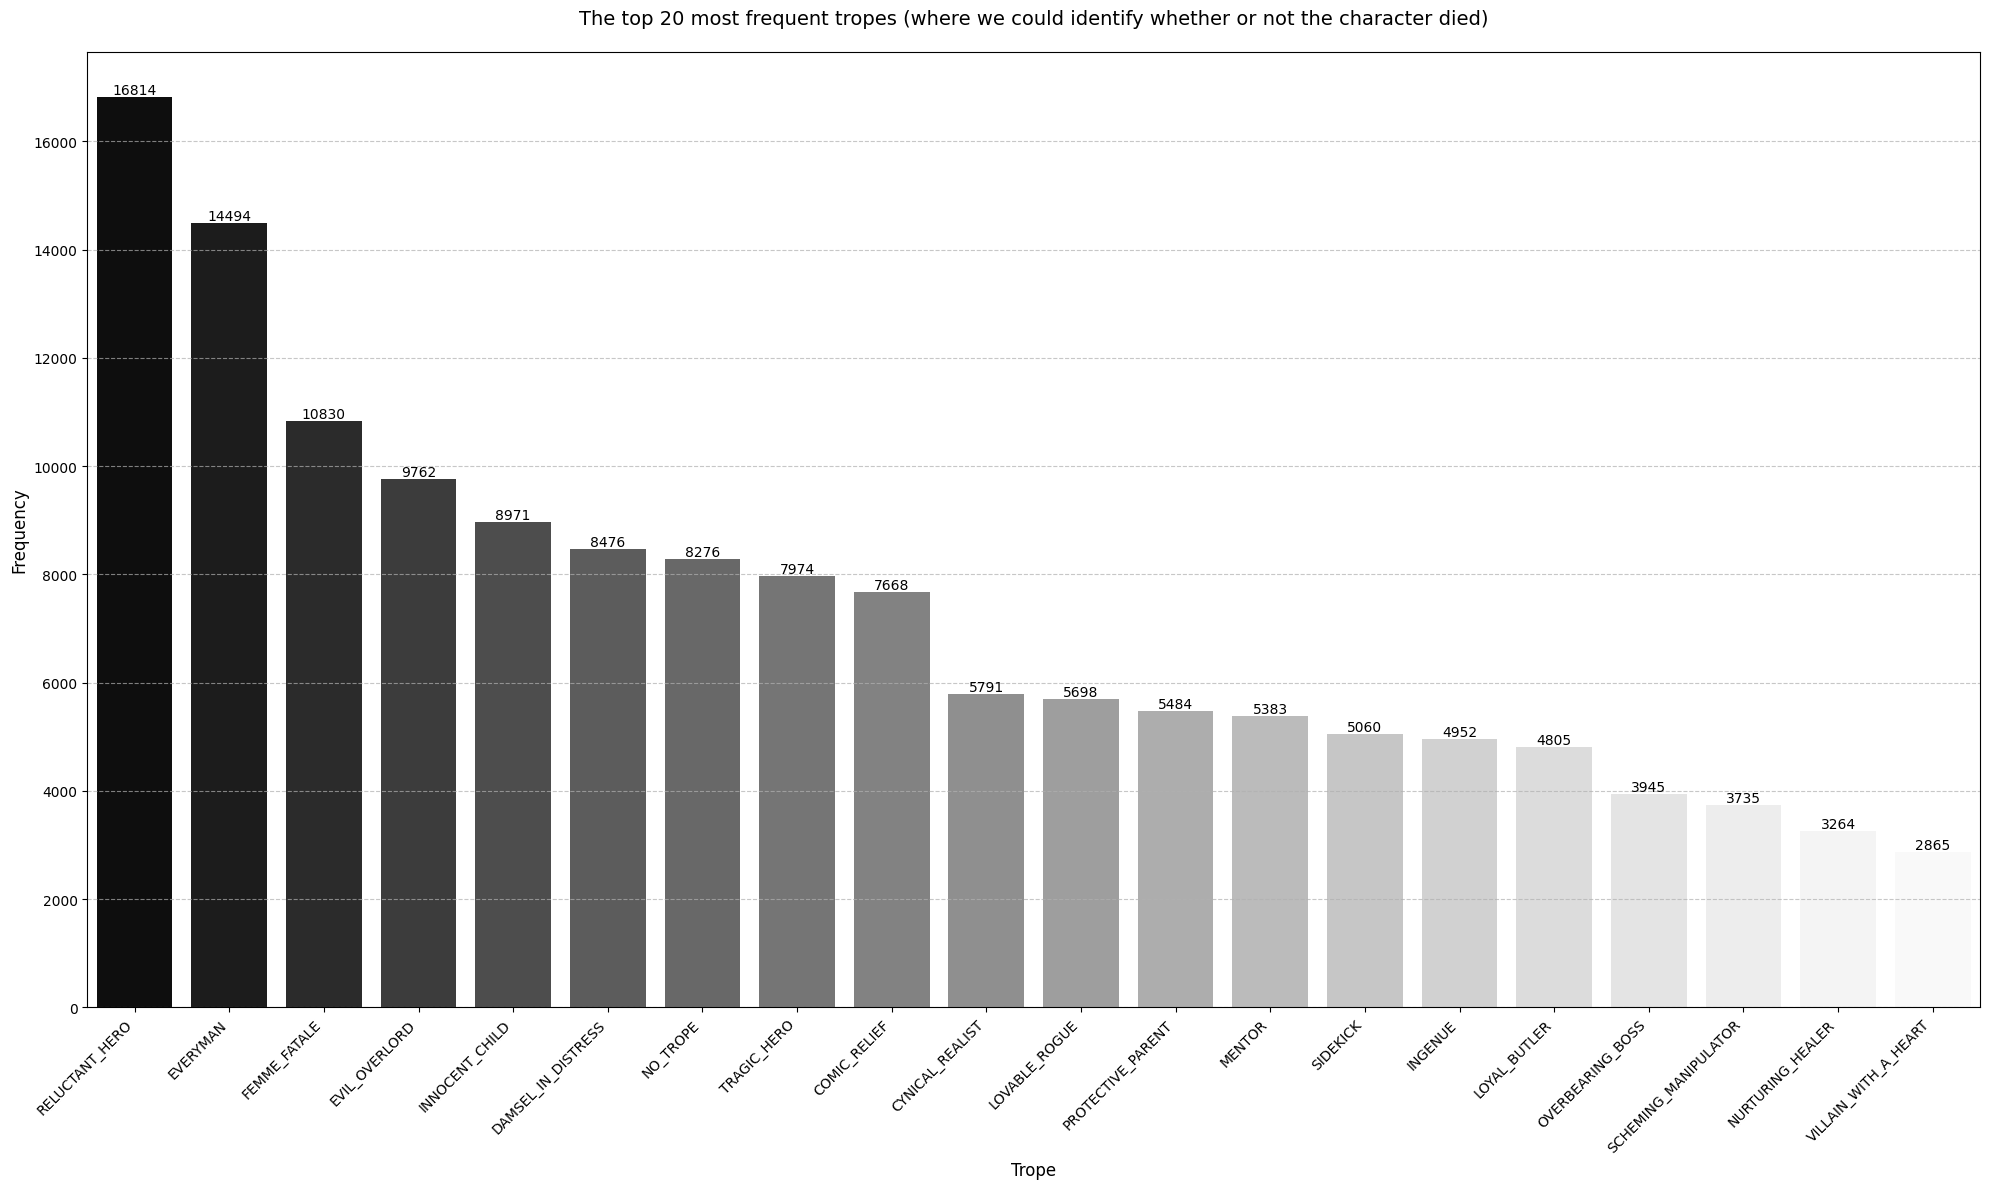


Top 10 most common tropes:
          trope_id  count
    RELUCTANT_HERO  16814
          EVERYMAN  14494
      FEMME_FATALE  10830
     EVIL_OVERLORD   9762
    INNOCENT_CHILD   8971
DAMSEL_IN_DISTRESS   8476
          NO_TROPE   8276
       TRAGIC_HERO   7974
      COMIC_RELIEF   7668
   CYNICAL_REALIST   5791


In [7]:
trope_freq = df_characters.dropna(subset=['died']).groupby('trope_id').size().reset_index(name='count')
trope_freq = trope_freq.sort_values('count', ascending=False)

print(f"In total we have {trope_freq['count'].sum()} characters whose trope we identified while also knowing if they died in the movie.")
print(f"Tropes classified into {len(df_tropes)} tropes (1 of them being the \"NO TROPE\" trope).")

threshold=20

plt.figure(figsize=(20, 12))

sns.barplot(
    data=trope_freq[:threshold],
    x='trope_id',
    y='count',
    palette='Greys_r'
)

plt.title(f'The top {threshold} most frequent tropes (where we could identify whether or not the character died)', pad=20, fontsize=14)
plt.xlabel('Trope', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(trope_freq[:threshold]['count']):
    plt.text(i, v, f'{v}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

threshold=10
print(f'\nTop {threshold} most common tropes:')
print(trope_freq.head(threshold).to_string(index=False))

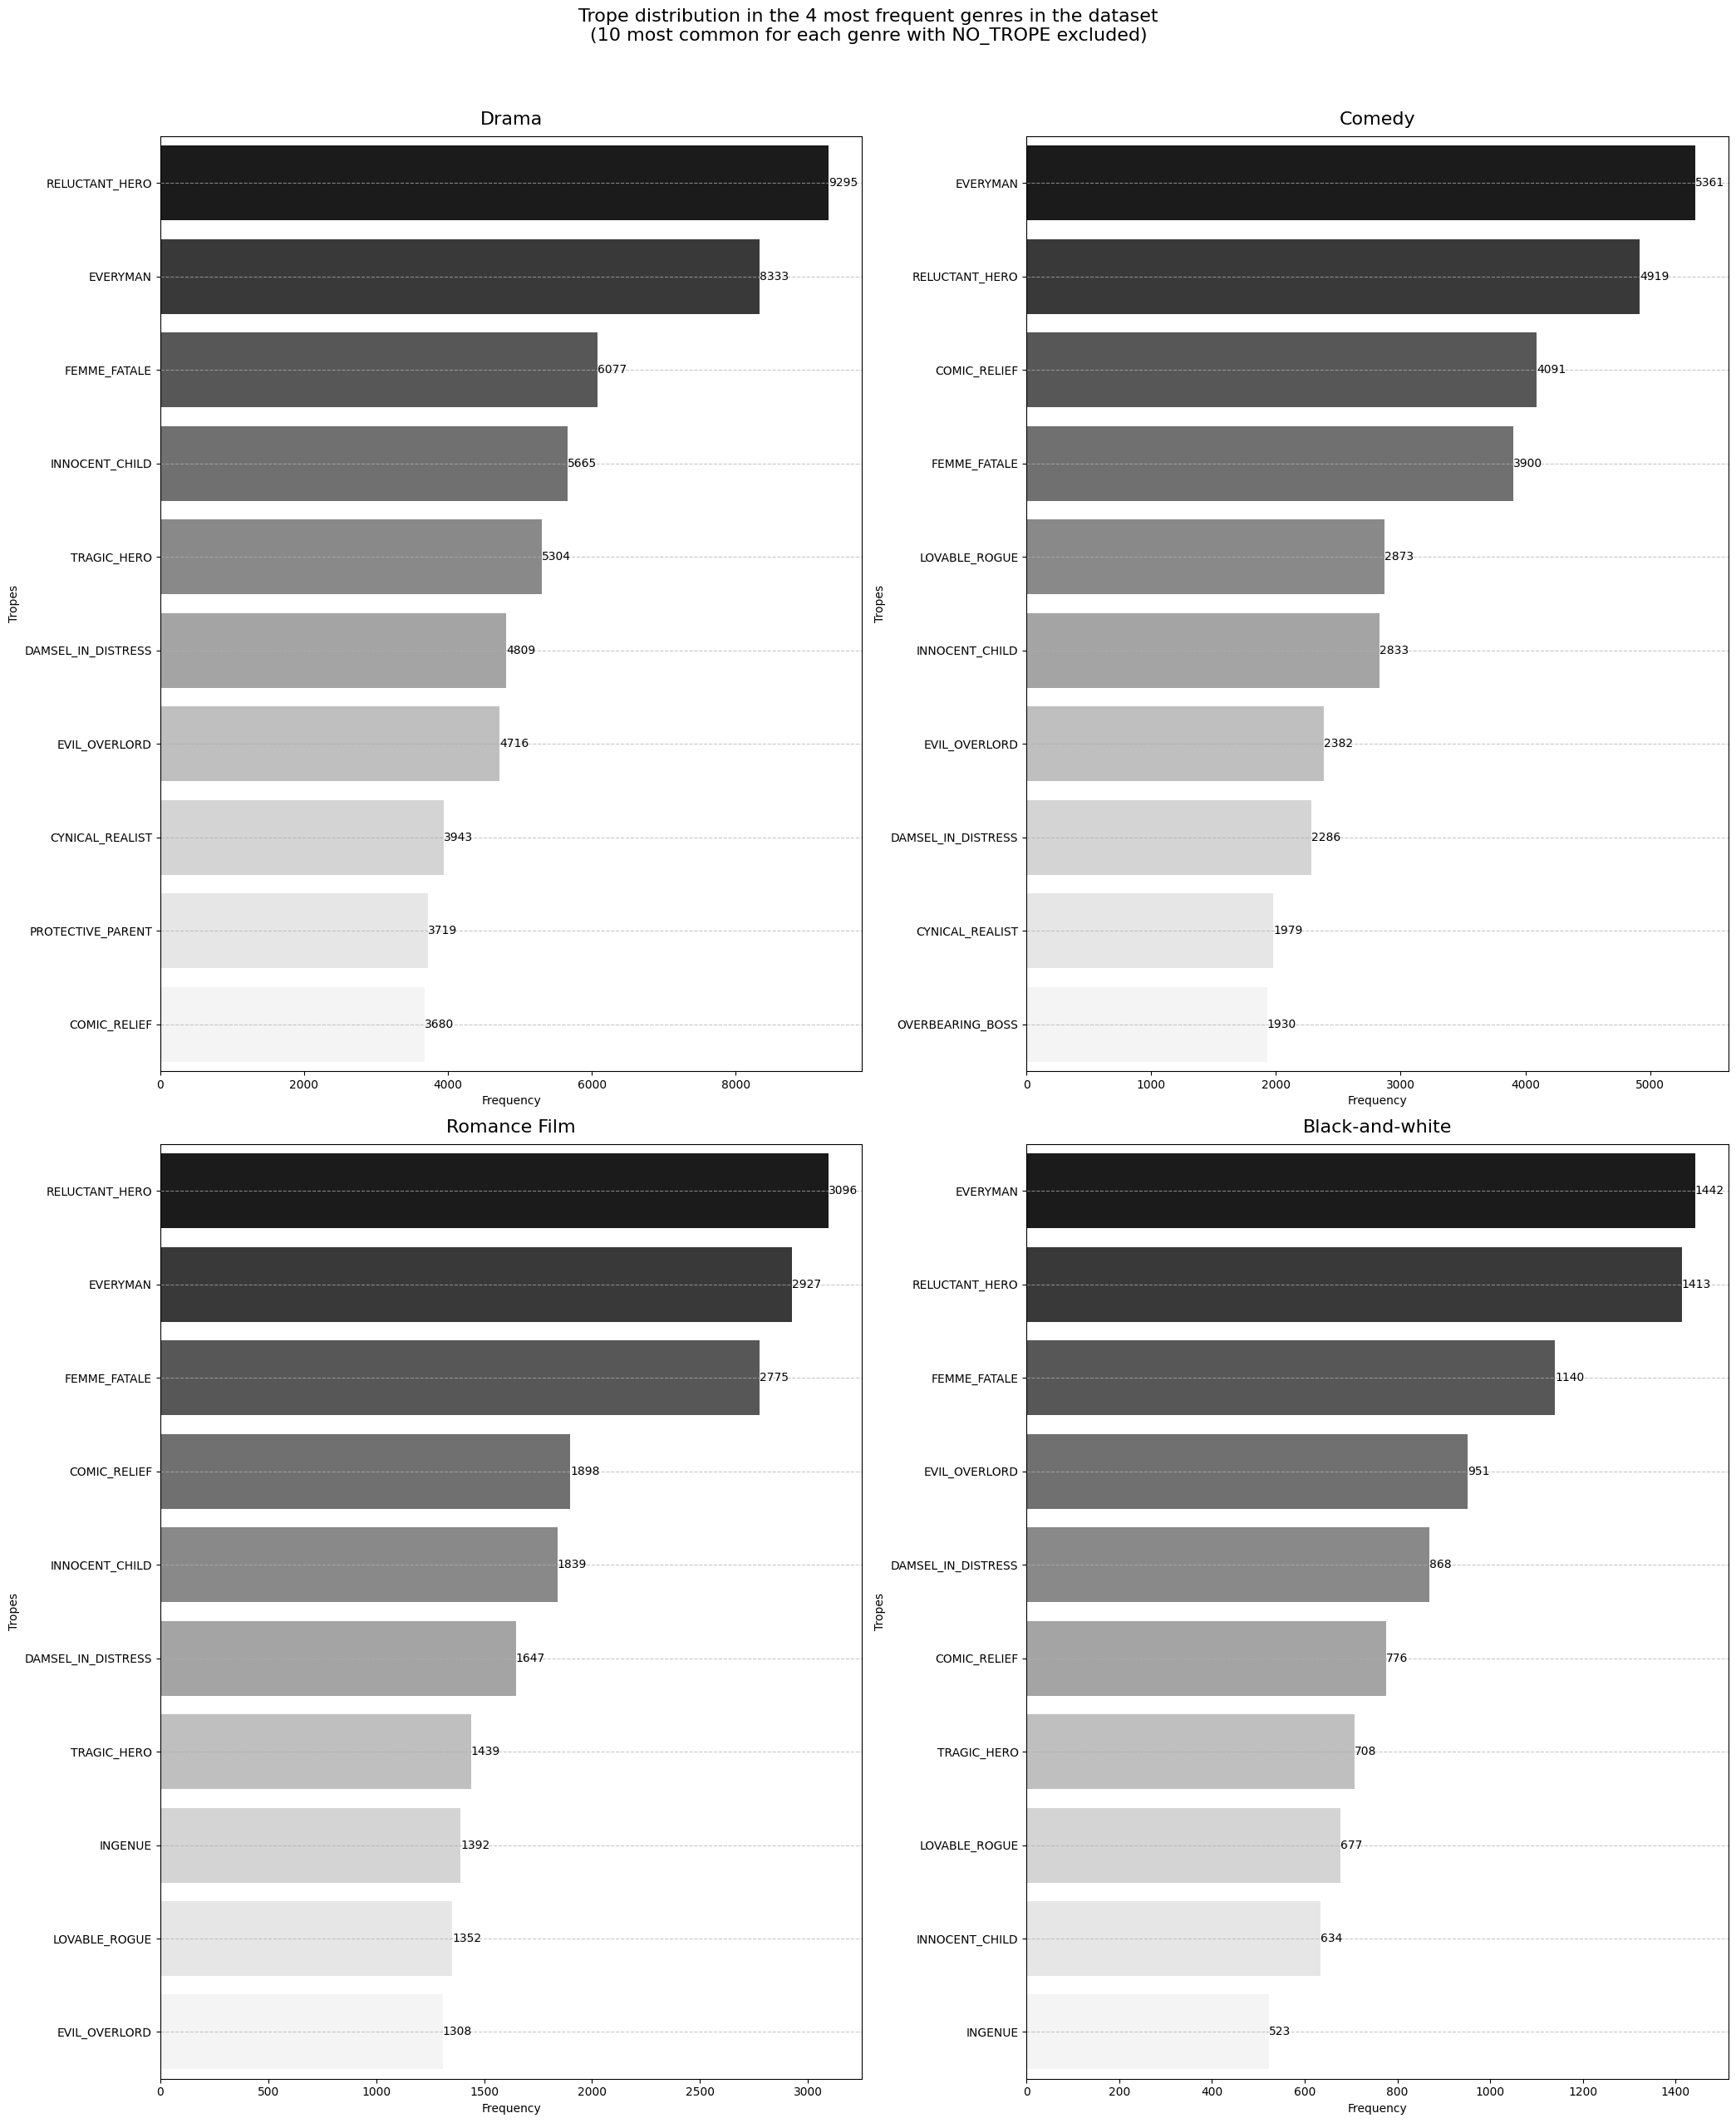


Top 10 most common tropes in Drama:
          trope_id  count
    RELUCTANT_HERO   9295
          EVERYMAN   8333
      FEMME_FATALE   6077
    INNOCENT_CHILD   5665
       TRAGIC_HERO   5304
DAMSEL_IN_DISTRESS   4809
     EVIL_OVERLORD   4716
   CYNICAL_REALIST   3943
 PROTECTIVE_PARENT   3719
      COMIC_RELIEF   3680

Top 10 most common tropes in Comedy:
          trope_id  count
          EVERYMAN   5361
    RELUCTANT_HERO   4919
      COMIC_RELIEF   4091
      FEMME_FATALE   3900
     LOVABLE_ROGUE   2873
    INNOCENT_CHILD   2833
     EVIL_OVERLORD   2382
DAMSEL_IN_DISTRESS   2286
   CYNICAL_REALIST   1979
  OVERBEARING_BOSS   1930

Top 10 most common tropes in Romance Film:
          trope_id  count
    RELUCTANT_HERO   3096
          EVERYMAN   2927
      FEMME_FATALE   2775
      COMIC_RELIEF   1898
    INNOCENT_CHILD   1839
DAMSEL_IN_DISTRESS   1647
       TRAGIC_HERO   1439
           INGENUE   1392
     LOVABLE_ROGUE   1352
     EVIL_OVERLORD   1308

Top 10 most common tro

In [8]:
df_trope_genre = pd.merge(df_movies, df_characters, on='wikipedia_movie_id', how='inner')[['trope_id', 'genres_list']].explode('genres_list')
df_trope_genre = df_trope_genre[df_trope_genre.trope_id != 'NO_TROPE']
df_trope_genre = df_trope_genre[df_trope_genre.genres_list.isin(genres_freq.head(4).genres_list)]

fig, axes = plt.subplots(2, 2, figsize=(21, 25))
axes = axes.flatten()

dfs = []

genre_count=4
threshold=10

for idx, genre in enumerate(genres_freq.head(genre_count).genres_list):
    genre_tropes = df_trope_genre[df_trope_genre['genres_list'] == genre]
    genre_freq = genre_tropes.groupby('trope_id').size().reset_index(name='count')
    genre_freq = genre_freq.sort_values('count', ascending=False)[:threshold]

    dfs.append(genre_freq)

    sns.barplot(
        data=genre_freq,
        x='count',
        y='trope_id',
        ax=axes[idx],
        palette='Greys_r'
    )
    
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
    
    axes[idx].set_title(f'{genre}', pad=10, fontsize=16)
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_ylabel('Tropes')
    
    # Add text on the bars (adjust text position to work with horizontal bars)
    for i, v in enumerate(genre_freq['count']):
        axes[idx].text(v, i, f'{v}', va='center')

# Add a title for the whole figure
plt.suptitle(f'Trope distribution in the {genre_count} most frequent genres in the dataset\n({threshold} most common for each genre with NO_TROPE excluded)', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

for idx, genre in enumerate(genres_freq.head(genre_count).genres_list):
    print(f'\nTop {threshold} most common tropes in {genre}:')
    print(dfs[idx].head(threshold).to_string(index=False))

## Death and Tropes

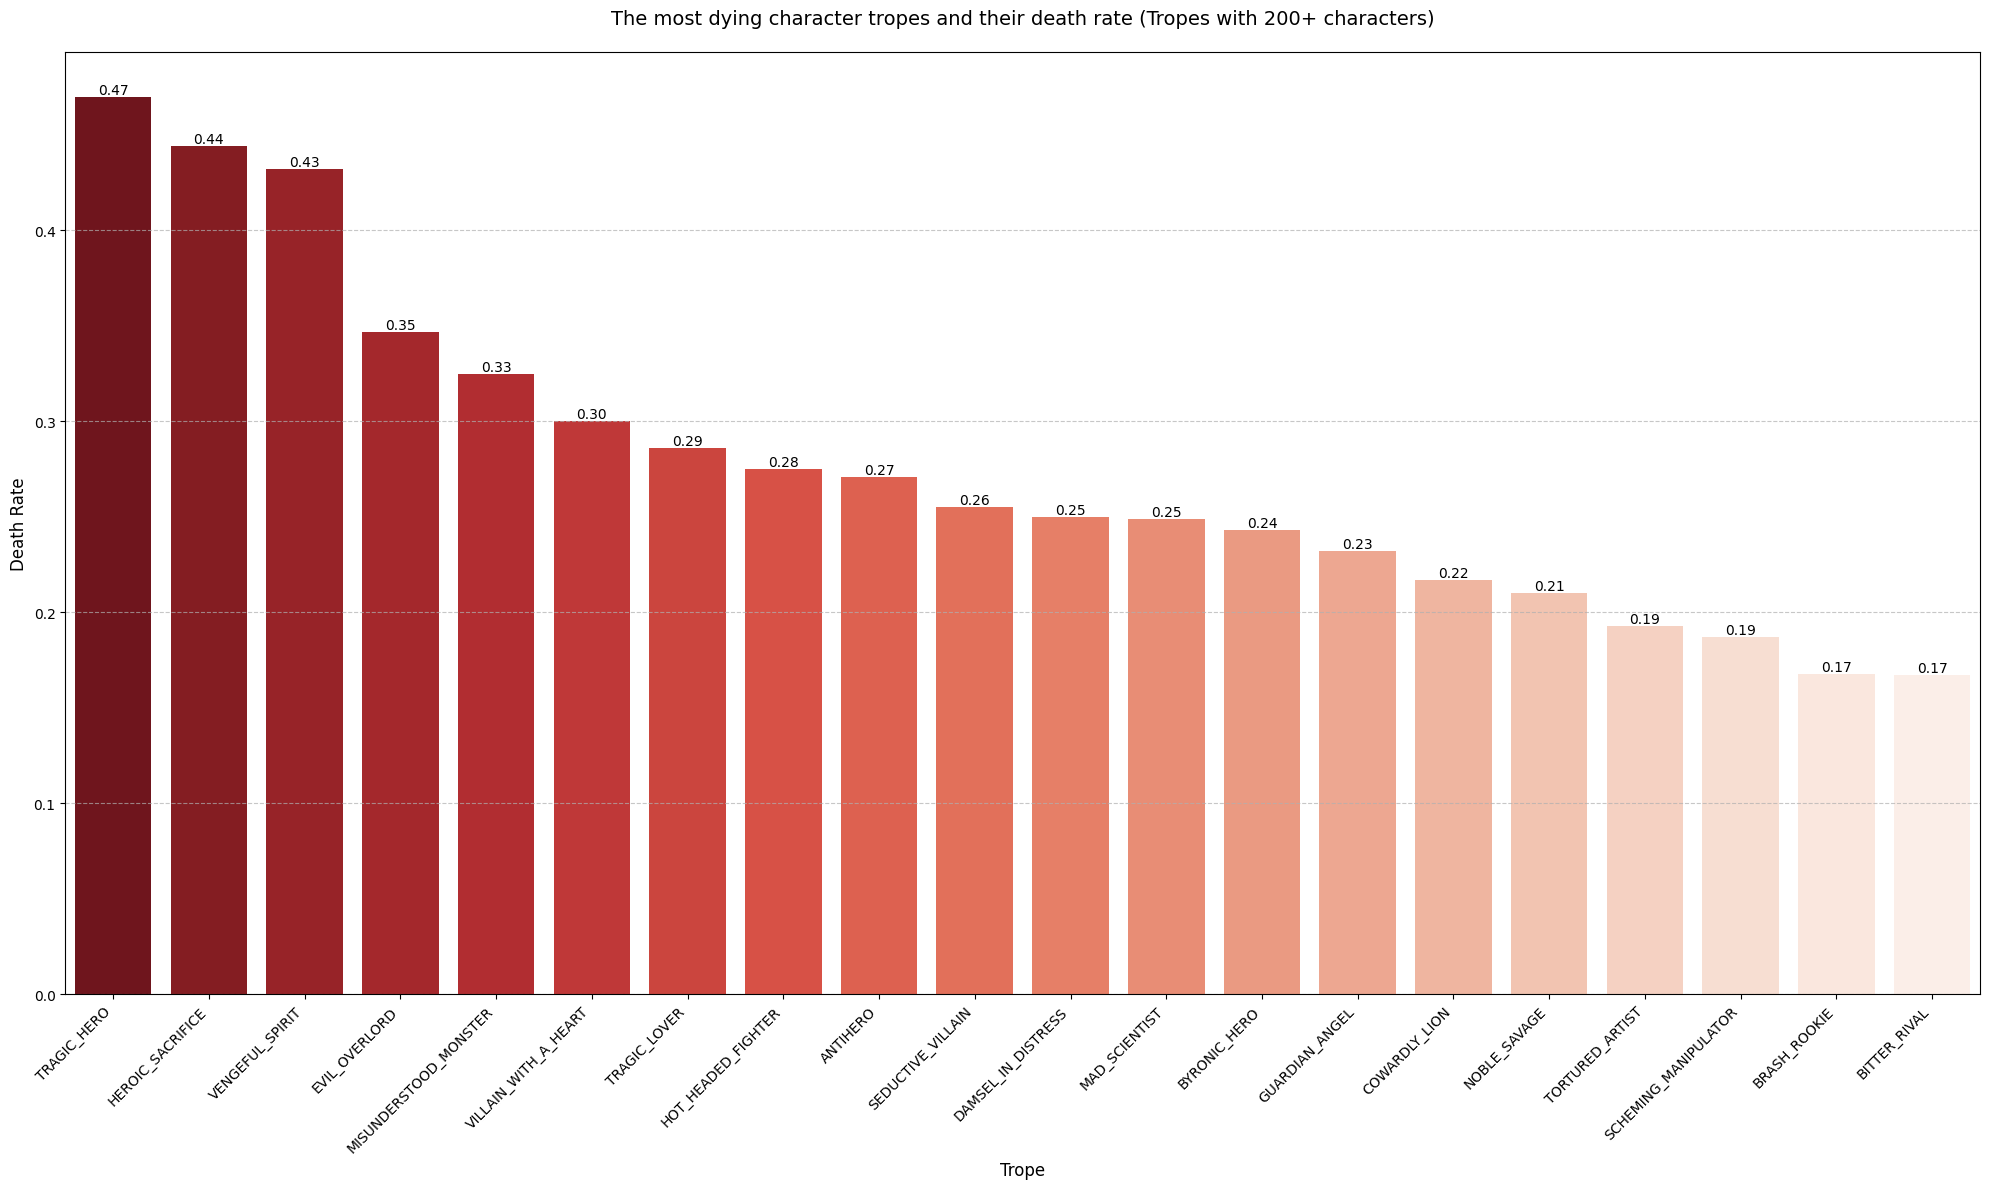


Top 10 "Deadliest" Tropes:
                       total_characters  death_rate
trope_id                                           
TRAGIC_HERO                        7974       0.470
HEROIC_SACRIFICE                    385       0.444
VENGEFUL_SPIRIT                     475       0.432
EVIL_OVERLORD                      9762       0.347
MISUNDERSTOOD_MONSTER              1822       0.325
VILLAIN_WITH_A_HEART               2865       0.300
TRAGIC_LOVER                       1662       0.286
HOT_HEADED_FIGHTER                  444       0.275
ANTIHERO                           1146       0.271
SEDUCTIVE_VILLAIN                   800       0.255

Overall mortality rate: 0.142


In [9]:
mortality_by_trope = df_characters.groupby('trope_id').agg({
    'died': ['count', 'sum', 'mean']
}).round(3)
mortality_by_trope.columns = ['total_characters', 'total_deaths', 'death_rate']

trope_threshold = 200
significant_mortality = mortality_by_trope[mortality_by_trope['total_characters'] >= trope_threshold]
significant_mortality = significant_mortality.sort_values('death_rate', ascending=False)

plt.figure(figsize=(20, 12))

sns.barplot(
    data=significant_mortality[:20].reset_index(),
    x='trope_id',
    y='death_rate',
    palette='Reds_r'
)

plt.title(f'The most dying character tropes and their death rate (Tropes with {trope_threshold}+ characters)', pad=20, fontsize=14)
plt.xlabel('Trope', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(significant_mortality[:20]['death_rate']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

shown_number = 10
print(f'\nTop {shown_number} "Deadliest" Tropes:')
print(significant_mortality[['total_characters', 'death_rate']].head(shown_number).to_string())

print('\nOverall mortality rate:', df_characters['died'].mean().round(3))

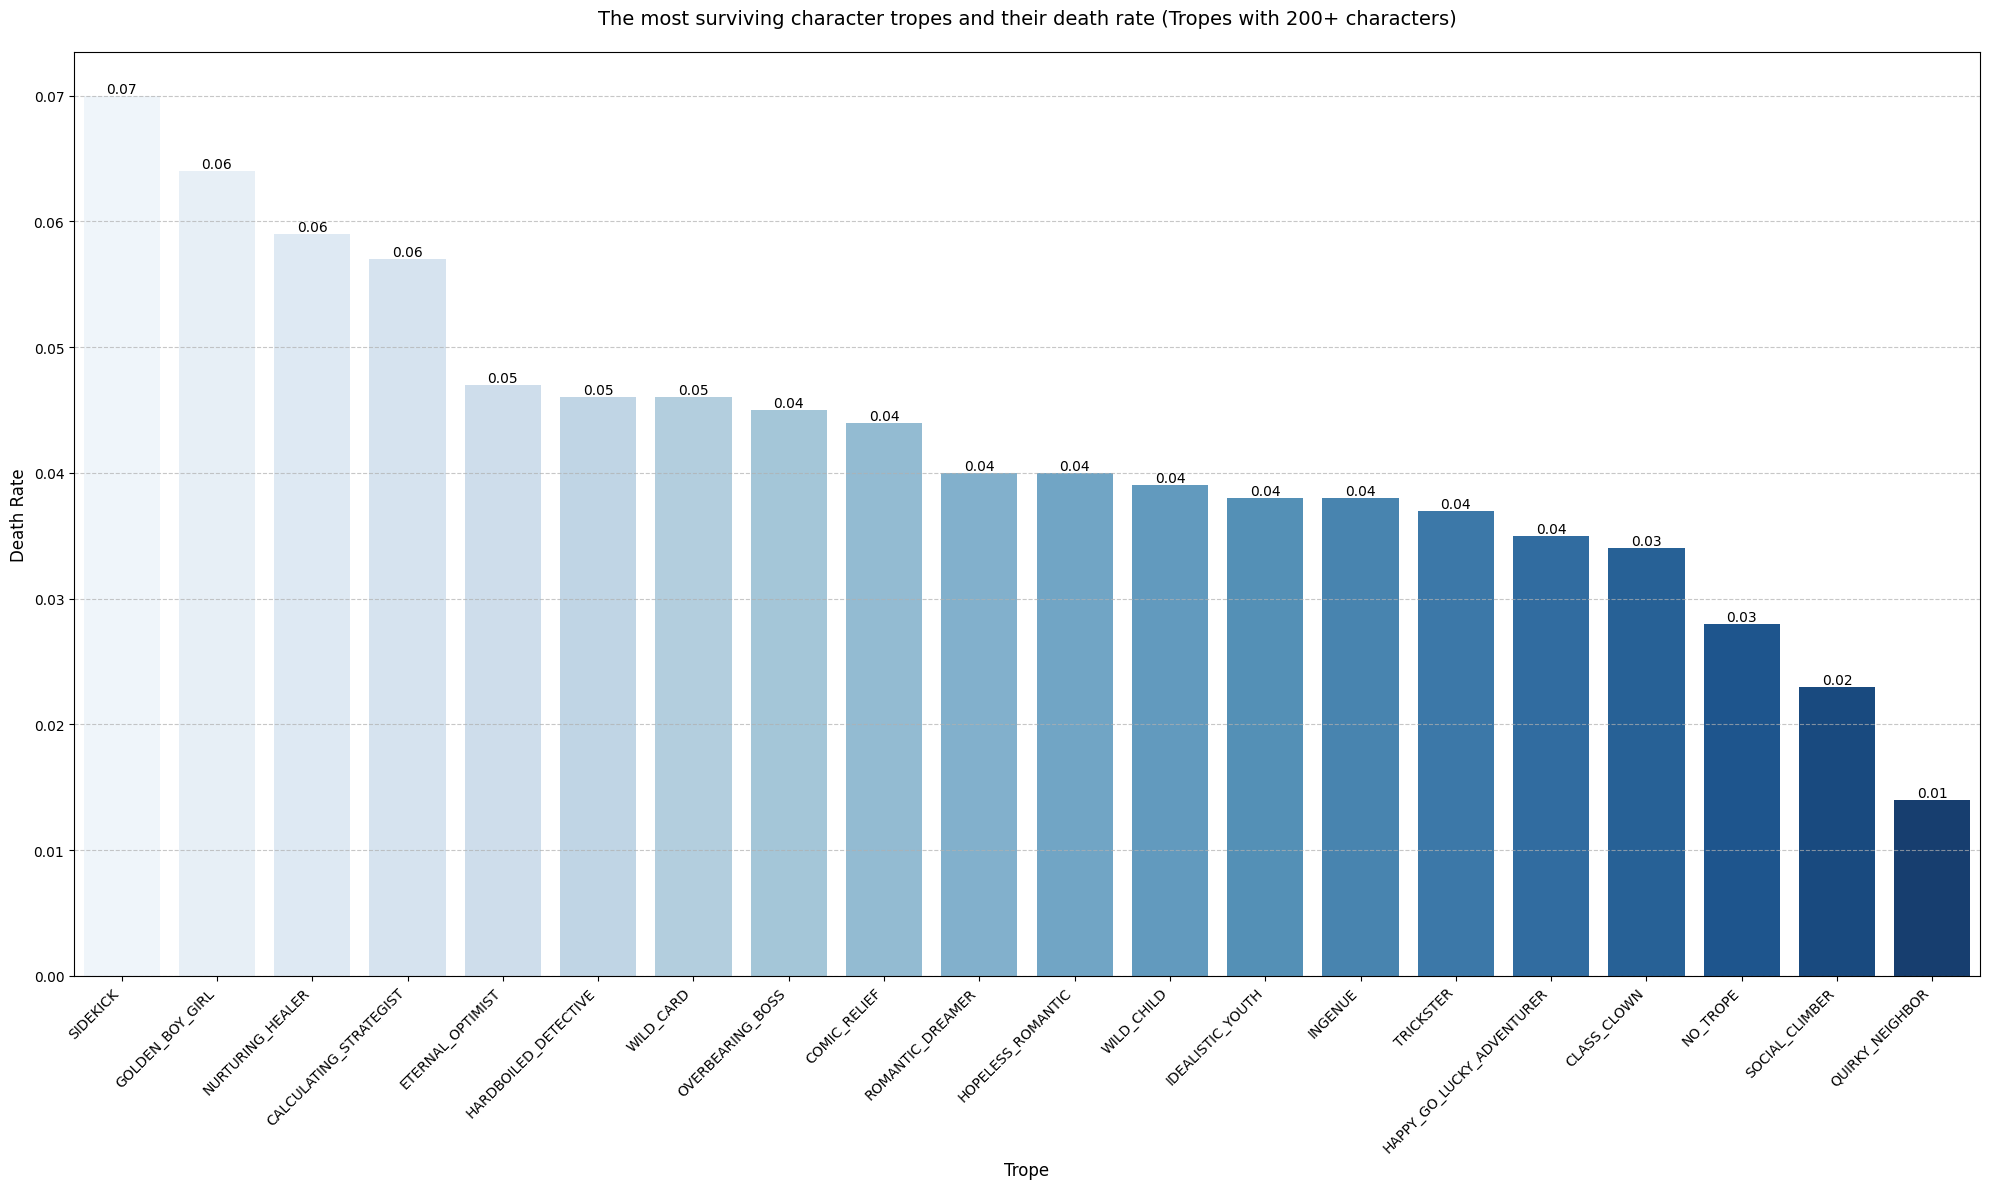


Top 10 "Surviving" character tropes:
                           total_characters  death_rate
trope_id                                               
HOPELESS_ROMANTIC                       619       0.040
WILD_CHILD                              257       0.039
IDEALISTIC_YOUTH                        501       0.038
INGENUE                                4952       0.038
TRICKSTER                               677       0.037
HAPPY_GO_LUCKY_ADVENTURER               489       0.035
CLASS_CLOWN                             232       0.034
NO_TROPE                               8276       0.028
SOCIAL_CLIMBER                          426       0.023
QUIRKY_NEIGHBOR                        1003       0.014

Overall mortality rate: 0.142


In [10]:
plt.figure(figsize=(20, 12))

sns.barplot(
    data=significant_mortality[-20:].reset_index(),
    x='trope_id',
    y='death_rate',
    palette='Blues'
)

plt.title(f'The most surviving character tropes and their death rate (Tropes with {trope_threshold}+ characters)', pad=20, fontsize=14)
plt.xlabel('Trope', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(significant_mortality[-20:]['death_rate']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

shown_number = 10
print(f'\nTop {shown_number} "Surviving" character tropes:')
print(significant_mortality[['total_characters', 'death_rate']].tail(shown_number).to_string())

print('\nOverall mortality rate:', df_characters['died'].mean().round(3))

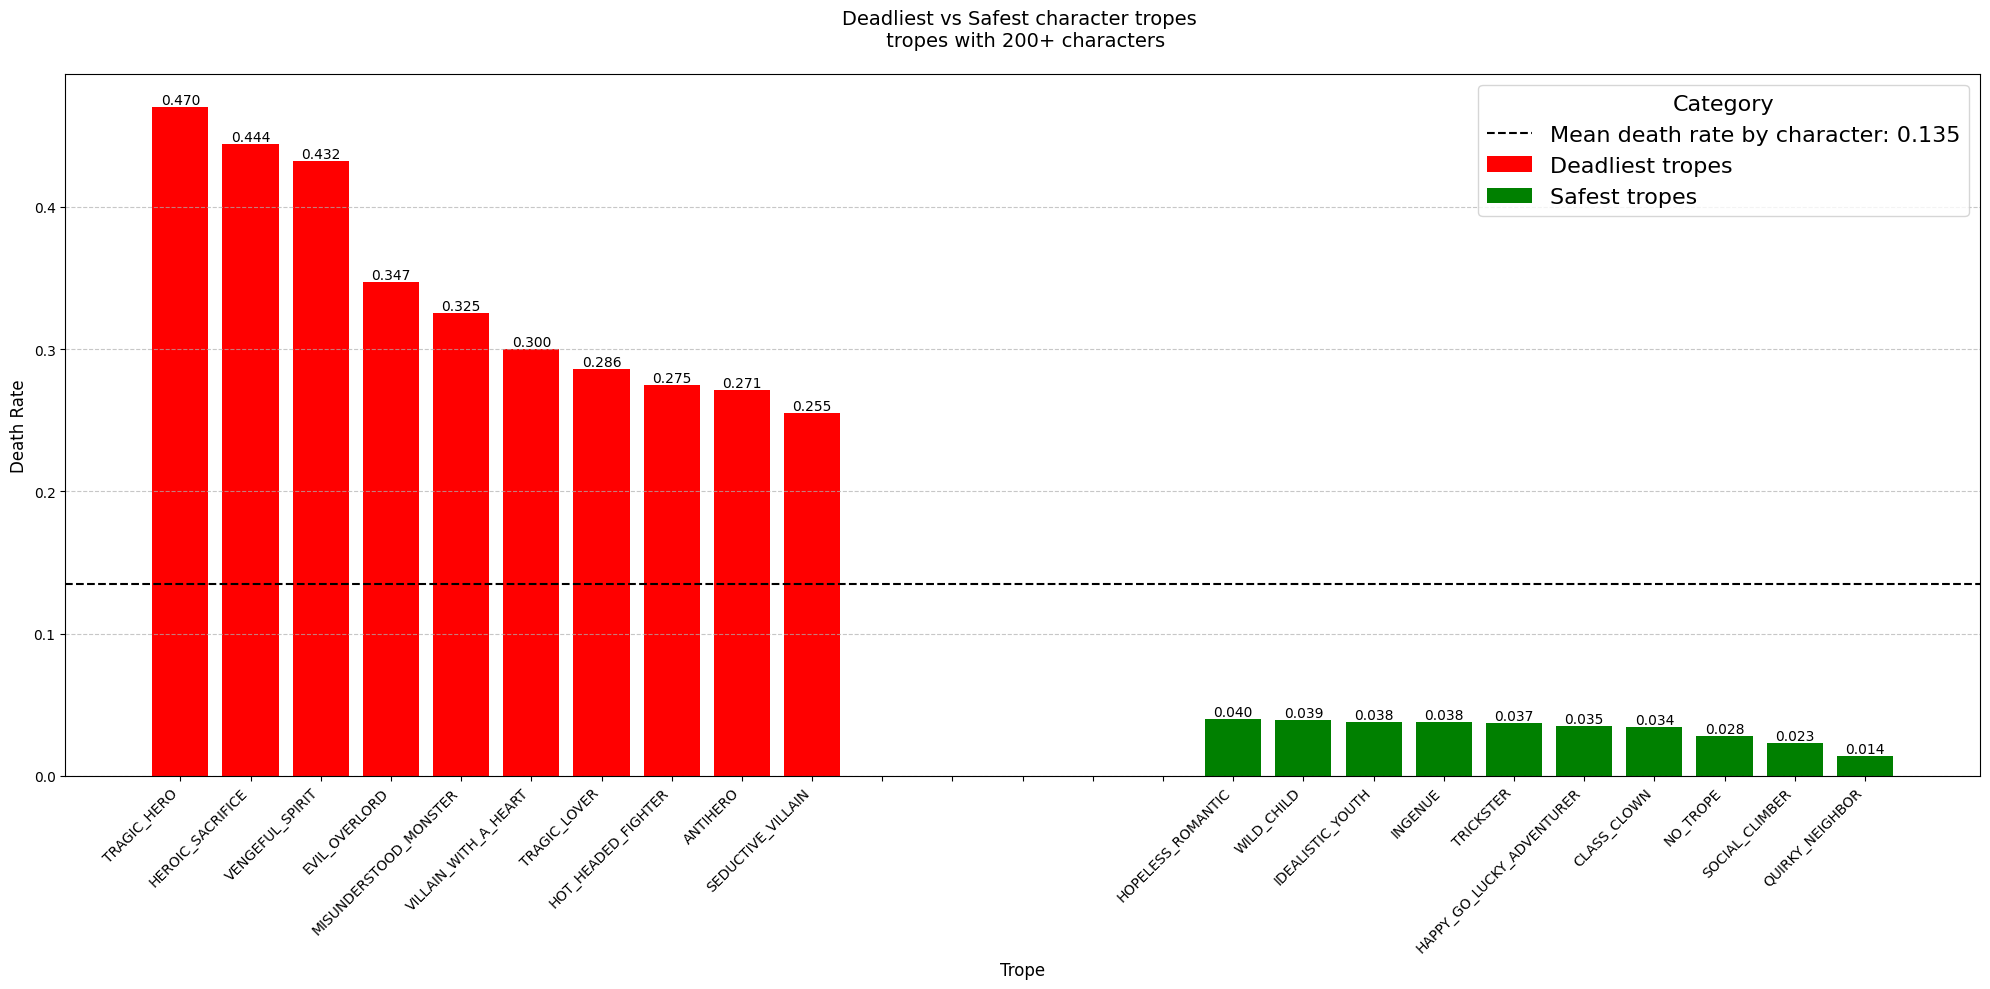


Overall mortality rate: 0.135

Top 10 deadliest character tropes:
                       total_characters  total_deaths  death_rate
trope_id                                                         
TRAGIC_HERO                        7974        3747.0       0.470
HEROIC_SACRIFICE                    385         171.0       0.444
VENGEFUL_SPIRIT                     475         205.0       0.432
EVIL_OVERLORD                      9762        3386.0       0.347
MISUNDERSTOOD_MONSTER              1822         592.0       0.325
VILLAIN_WITH_A_HEART               2865         860.0       0.300
TRAGIC_LOVER                       1662         476.0       0.286
HOT_HEADED_FIGHTER                  444         122.0       0.275
ANTIHERO                           1146         310.0       0.271
SEDUCTIVE_VILLAIN                   800         204.0       0.255

Top 10 safest character tropes:
                           total_characters  total_deaths  death_rate
trope_id                              

In [11]:
mortality_by_trope = df_characters.groupby('trope_id').agg({
    'died': ['count', 'sum', 'mean']
}).round(3)
mortality_by_trope.columns = ['total_characters', 'total_deaths', 'death_rate']

trope_threshold = 200
significant_character_mortality = mortality_by_trope[mortality_by_trope['total_characters'] >= trope_threshold]
significant_character_mortality = significant_character_mortality.sort_values('death_rate', ascending=False)

shown_number = 10
top_ = significant_character_mortality.head(shown_number).reset_index()
bottom_ = significant_character_mortality.tail(shown_number).reset_index()

plt.figure(figsize=(20, 10))

positions = np.concatenate([
    np.arange(shown_number),
    np.arange(shown_number + 5, 2 * shown_number + 5)
])
plt.bar(positions[:shown_number], top_['death_rate'], color='red', label='Deadliest tropes')
plt.bar(positions[shown_number:], bottom_['death_rate'], color='green', label='Safest tropes')

plt.title(f'Deadliest vs Safest character tropes \n tropes with {trope_threshold}+ characters', 
          pad=20, fontsize=14)
plt.xlabel('Trope', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)

mean_death_rate = significant_character_mortality['death_rate'].mean()
plt.axhline(y=mean_death_rate, color='black', linestyle='--', label=f'Mean death rate by character: {mean_death_rate:.3f}')

all_labels = list(top_['trope_id']) + [''] * 5 + list(bottom_['trope_id'])
plt.xticks(np.arange(len(all_labels)), all_labels, rotation=45, ha='right')


for i, v in enumerate(top_['death_rate']):
    plt.text(positions[i], v, f'{v:.3f}', ha='center', va='bottom')    
for i, v in enumerate(bottom_['death_rate']):
    plt.text(positions[i + shown_number], v, f'{v:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Category', fontsize=16, title_fontsize=16)
plt.tight_layout()
plt.show()

print(f'\nOverall mortality rate: {mean_death_rate:.3f}')
print(f'\nTop {shown_number} deadliest character tropes:')
print(significant_character_mortality.head(shown_number).to_string())
print(f'\nTop {shown_number} safest character tropes:')
print(significant_character_mortality.tail(shown_number).to_string())

## Genres

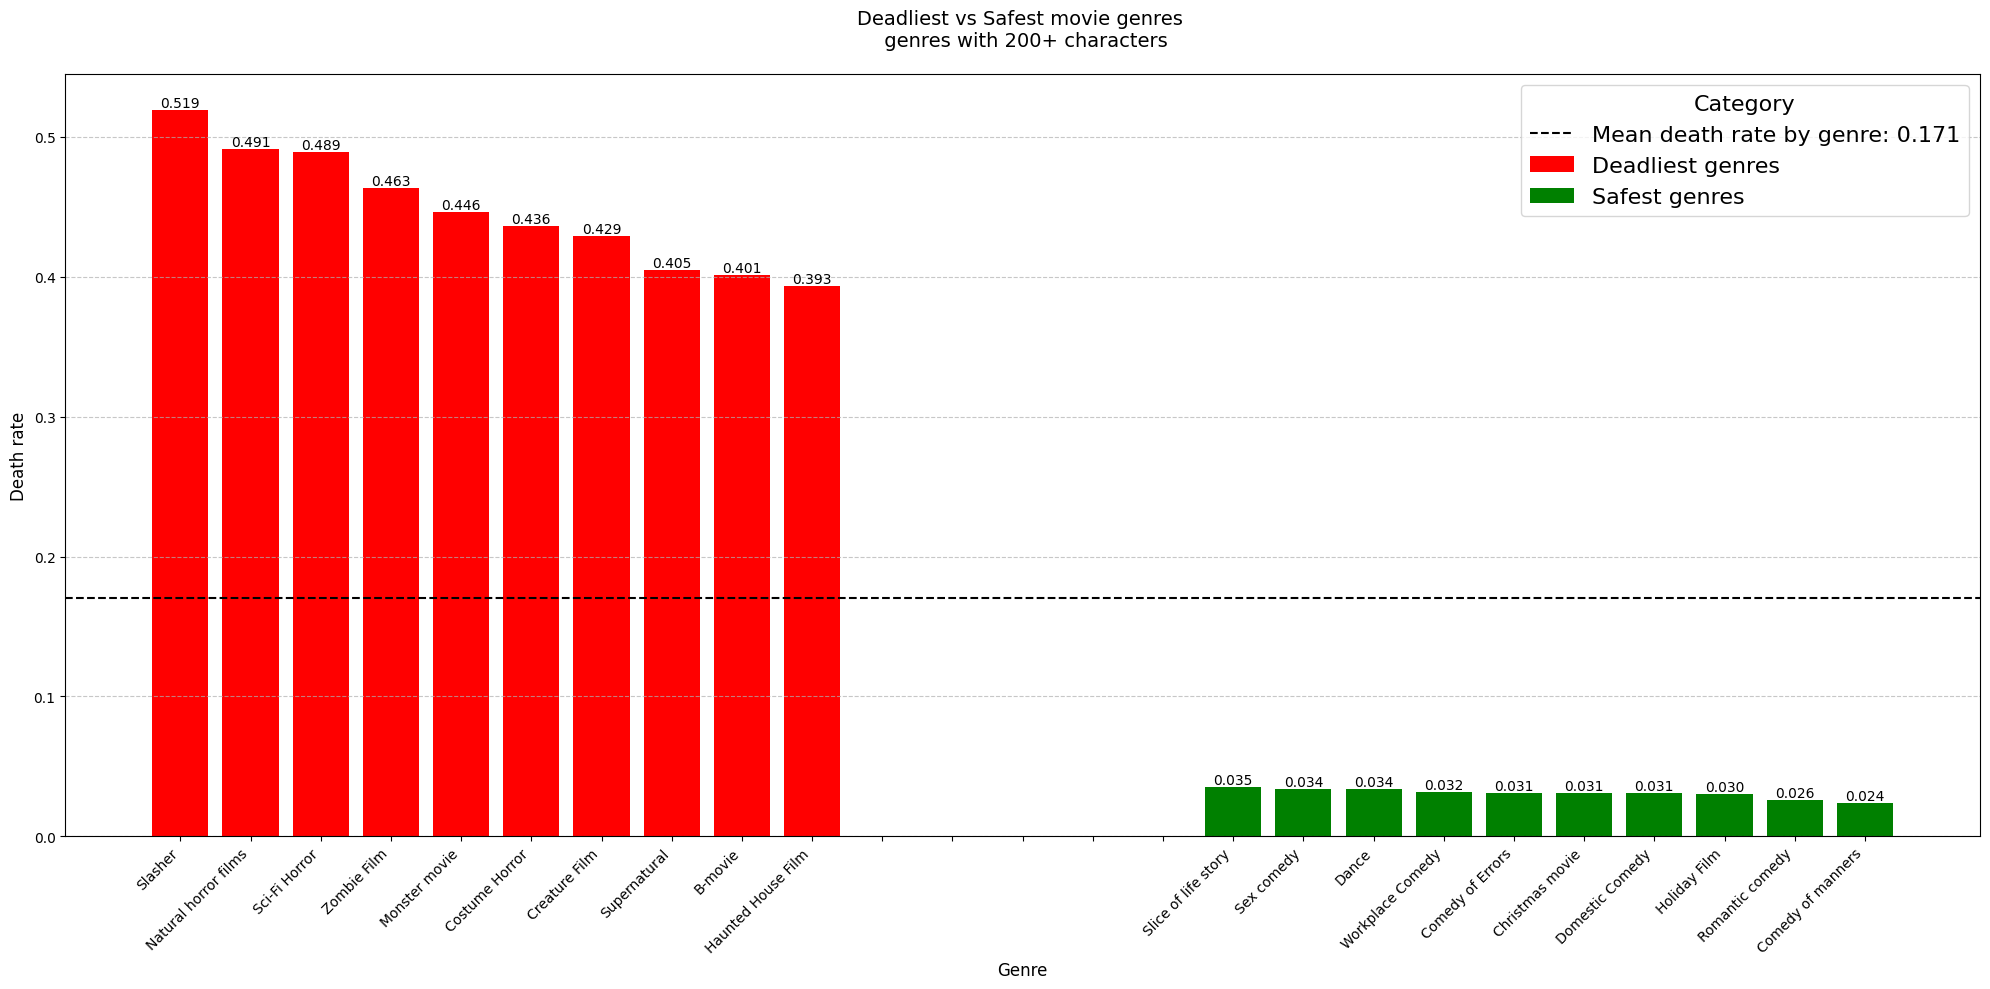


Overall mortality rate: 0.171

Top 10 deadliest genres:
                      total_characters  total_deaths  death_rate
genres_list                                                     
Slasher                           3110        1614.0       0.519
Natural horror films               648         318.0       0.491
Sci-Fi Horror                      593         290.0       0.489
Zombie Film                       1093         506.0       0.463
Monster movie                      717         320.0       0.446
Costume Horror                     250         109.0       0.436
Creature Film                     1542         661.0       0.429
Supernatural                      2808        1136.0       0.405
B-movie                           1438         577.0       0.401
Haunted House Film                 305         120.0       0.393

Top 10 safest genres:
                     total_characters  total_deaths  death_rate
genres_list                                                    
Slice of lif

In [12]:
df_merged = df_characters.merge(df_movies[['wikipedia_movie_id', 'genres_list']], 
                              on='wikipedia_movie_id')

df_exploded = df_merged.explode('genres_list')
mortality_by_genre = df_exploded.groupby('genres_list').agg({
    'died': ['count', 'sum', 'mean']
}).round(3)
mortality_by_genre.columns = ['total_characters', 'total_deaths', 'death_rate']

genre_threshold = 200
significant_genres_mortality = mortality_by_genre[mortality_by_genre['total_characters'] >= genre_threshold]
significant_genres_mortality = significant_genres_mortality.sort_values('death_rate', ascending=False)

shown_number = 10
top_ = significant_genres_mortality.head(shown_number).reset_index()
bottom_ = significant_genres_mortality.tail(shown_number).reset_index()

plt.figure(figsize=(20, 10))
positions = np.concatenate([
    np.arange(shown_number),
    np.arange(shown_number + 5, 2 * shown_number + 5)
])
plt.bar(positions[:shown_number], top_['death_rate'], color='red', label='Deadliest genres')
plt.bar(positions[shown_number:], bottom_['death_rate'], color='green', label='Safest genres')

plt.title(f'Deadliest vs Safest movie genres \n genres with {genre_threshold}+ characters', 
          pad=20, fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Death rate', fontsize=12)

mean_death_rate = significant_genres_mortality['death_rate'].mean()
plt.axhline(y=mean_death_rate, color='black', linestyle='--', label=f'Mean death rate by genre: {mean_death_rate:.3f}')

all_labels = list(top_['genres_list']) + [''] * 5 + list(bottom_['genres_list'])
plt.xticks(np.arange(len(all_labels)), all_labels, rotation=45, ha='right')

for i, v in enumerate(top_['death_rate']):
    plt.text(positions[i], v, f'{v:.3f}', ha='center', va='bottom')    
for i, v in enumerate(bottom_['death_rate']):
    plt.text(positions[i + shown_number], v, f'{v:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Category', fontsize=16, title_fontsize=16)
plt.tight_layout()
plt.show()

print(f'\nOverall mortality rate: {mean_death_rate:.3f}')
print(f'\nTop {shown_number} deadliest genres:')
print(significant_genres_mortality.head(shown_number).to_string())
print(f'\nTop {shown_number} safest genres:')
print(significant_genres_mortality.tail(shown_number).to_string())

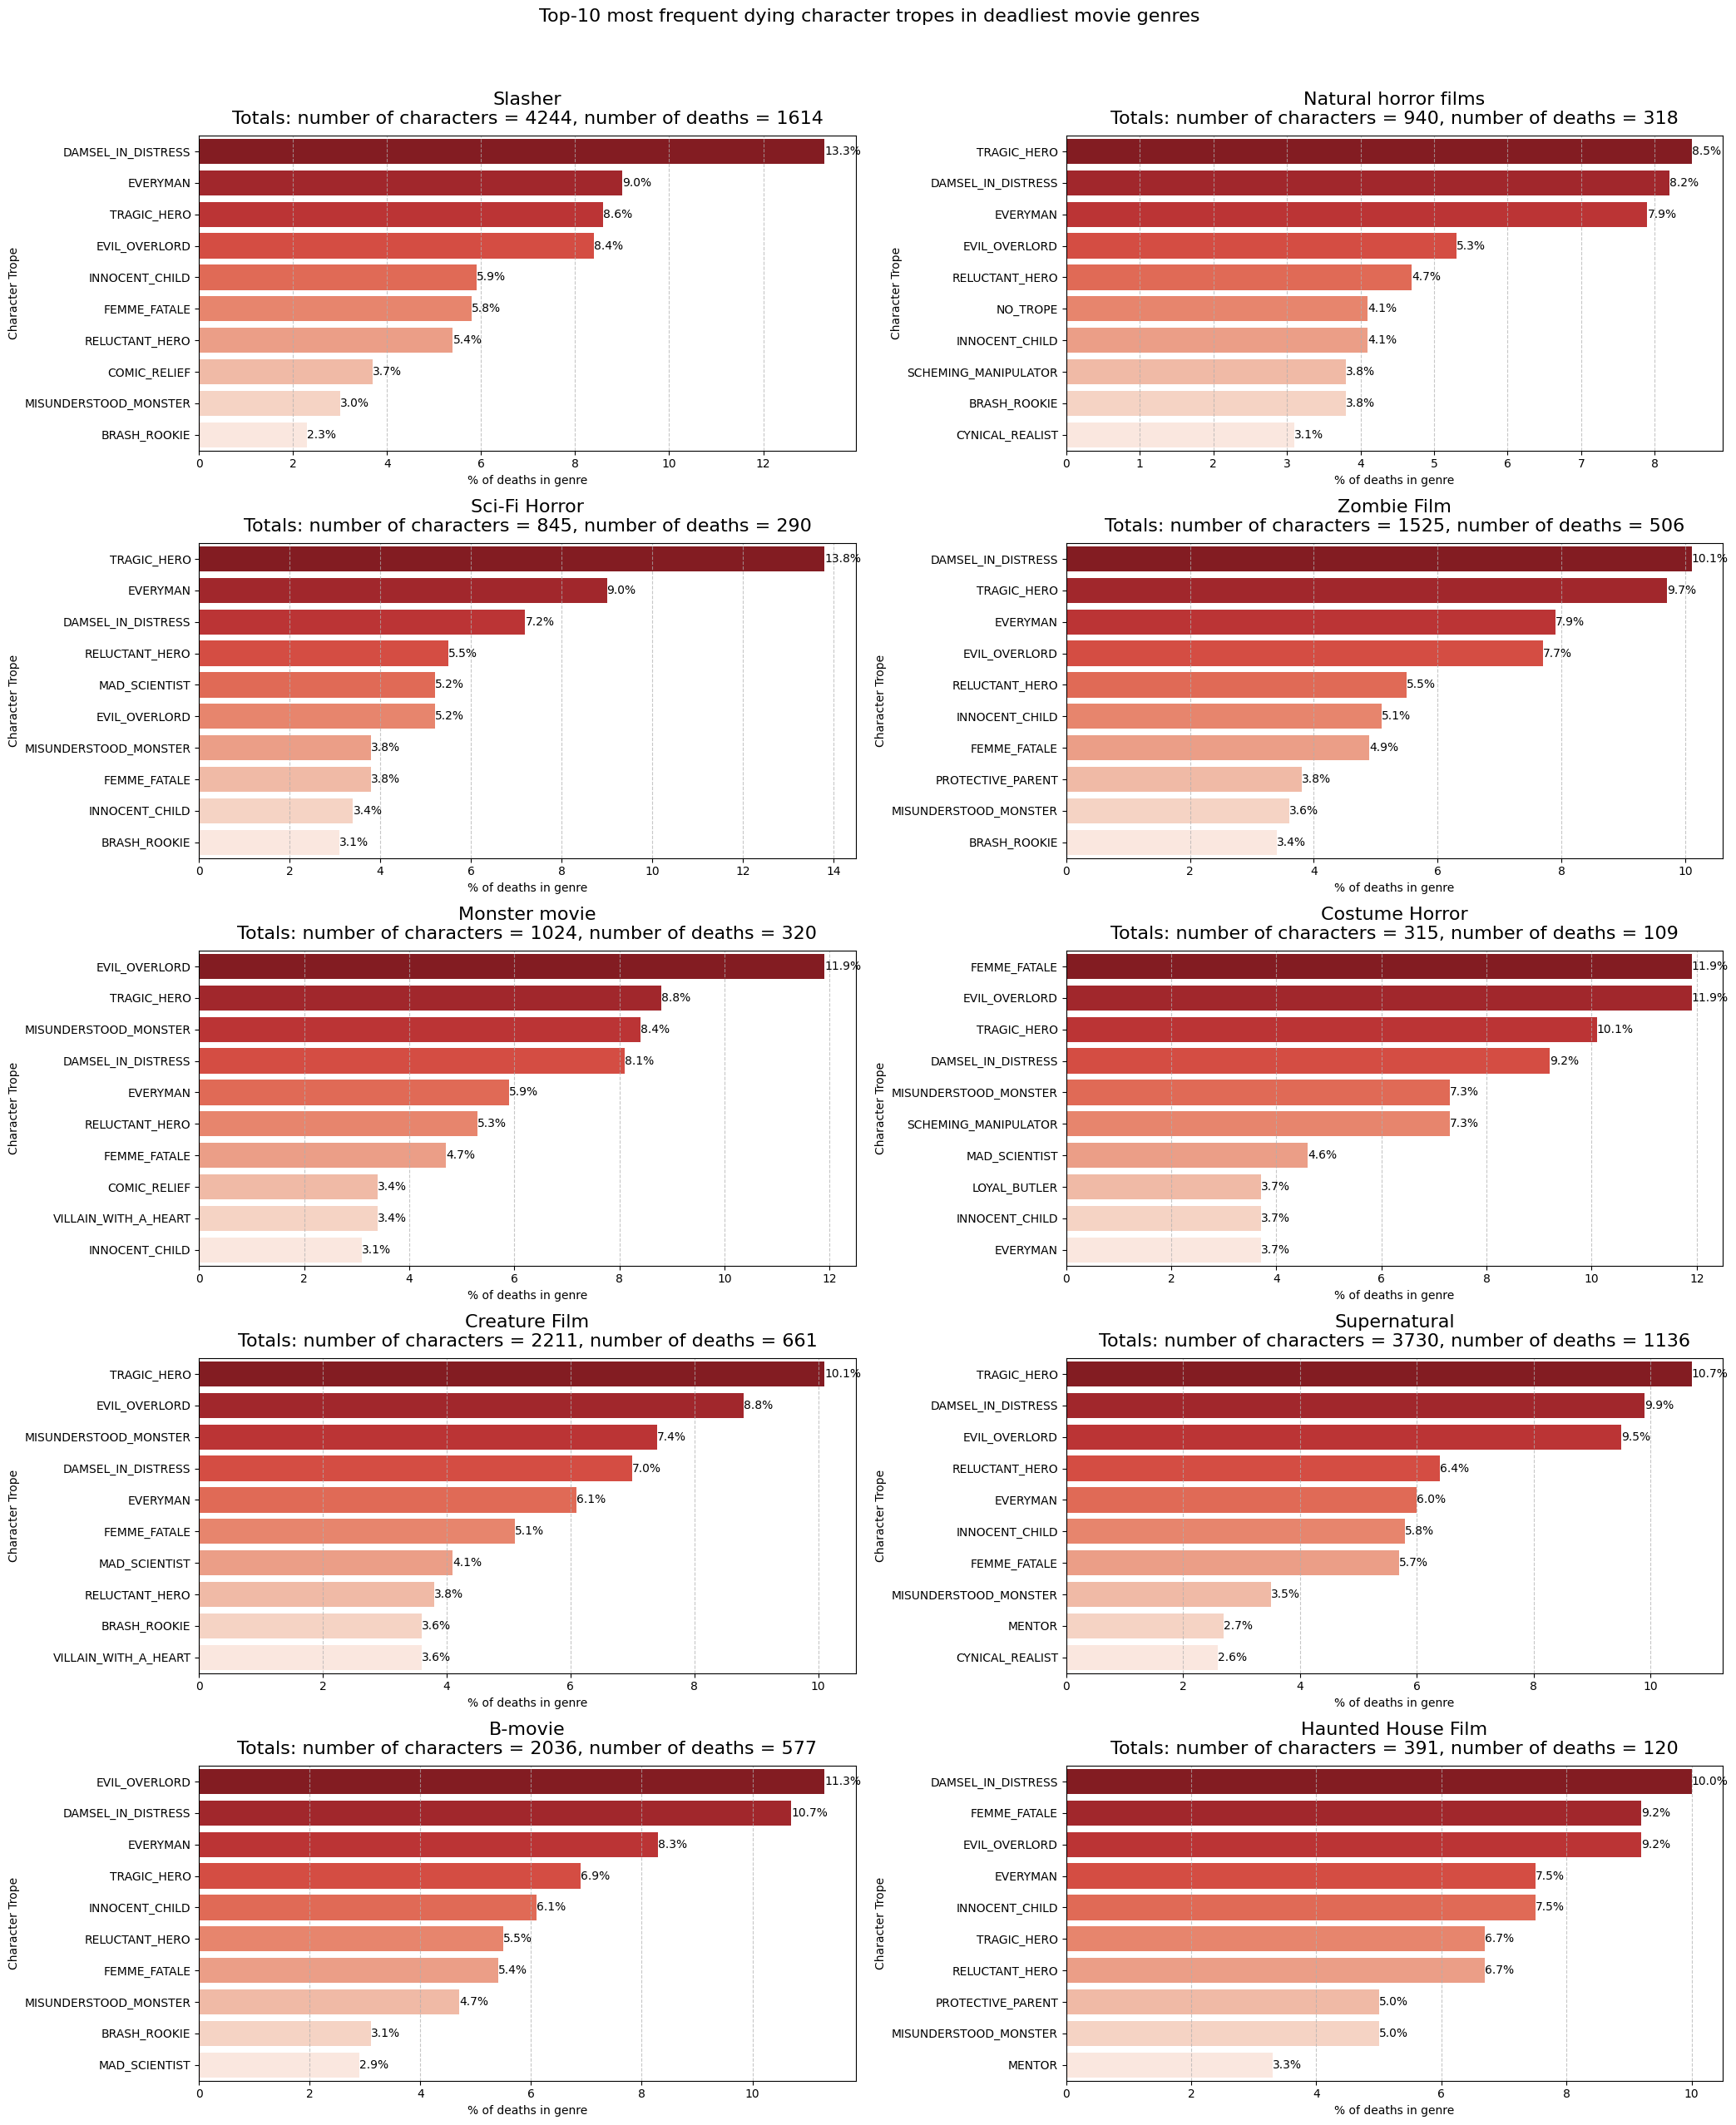


Detailed breakdown of deaths by trope in deadliest movie genres:

Slasher:
Totals: number of characters = 4244, number of deaths = 1614
                       Total characters  Number of deaths  Death rate  \
trope_id                                                                
DAMSEL_IN_DISTRESS                  337               215        63.8   
EVERYMAN                            341               145        42.5   
TRAGIC_HERO                         201               138        68.7   
EVIL_OVERLORD                       315               135        42.9   
INNOCENT_CHILD                      252                96        38.1   
FEMME_FATALE                        204                94        46.1   
RELUCTANT_HERO                      371                87        23.5   
COMIC_RELIEF                        149                60        40.3   
MISUNDERSTOOD_MONSTER               127                48        37.8   
BRASH_ROOKIE                         51                37   

In [13]:
top_deadly_genres = significant_genres_mortality.head(10).index

fig, axes = plt.subplots(5, 2, figsize=(21, 25))
axes = axes.flatten()

for idx, genre in enumerate(top_deadly_genres):
    genre_chars = df_exploded[df_exploded['genres_list'] == genre]
    total_chars = len(genre_chars)

    genre_deaths = df_exploded[
        (df_exploded['genres_list'] == genre) & 
        (df_exploded['died'] == 1.0)
    ]
    
    trope_deaths = genre_deaths['trope_id'].value_counts().head(10)
    
    total_deaths = genre_deaths['trope_id'].count()
    trope_death_pcts = (trope_deaths / total_deaths * 100).round(1)
    
    sns.barplot(
        x=trope_death_pcts.values,
        y=trope_deaths.index,
        ax=axes[idx],
        palette='Reds_r'
    )
    axes[idx].grid(axis='x', linestyle='--', alpha=0.7)
    
    axes[idx].set_title(f'{genre}\nTotals: number of characters = {total_chars}, number of deaths = {total_deaths}', pad=10, fontsize=16)
    axes[idx].set_xlabel('% of deaths in genre')
    axes[idx].set_ylabel('Character Trope')
    
    for i, v in enumerate(trope_death_pcts):
        axes[idx].text(v, i, f'{v}%', va='center')

plt.suptitle('Top-10 most frequent dying character tropes in deadliest movie genres', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print('\nDetailed breakdown of deaths by trope in deadliest movie genres:')
for genre in top_deadly_genres:
    print(f'\n{genre}:')
    genre_chars = df_exploded[df_exploded['genres_list'] == genre]
    total_chars = len(genre_chars)
    
    genre_deaths = genre_chars[genre_chars['died'] == 1.0]
    
    trope_deaths = genre_deaths['trope_id'].value_counts().head(10)
    total_deaths = genre_deaths['trope_id'].count()
    
    trope_totals = genre_chars['trope_id'].value_counts()
    
    stats_df = pd.DataFrame({
        'Total characters': trope_totals[trope_deaths.index],
        'Number of deaths': trope_deaths,
        'Death rate': (trope_deaths / trope_totals[trope_deaths.index] * 100).round(1),
        'Percentage of genre deaths': (trope_deaths / total_deaths * 100).round(1)
    })
    
    print(f'Totals: number of characters = {total_chars}, number of deaths = {total_deaths}')
    print(stats_df)


## Actors

In [14]:
df_actors = df_characters.dropna(subset=['actor_name'])

df_actors.head()

,wikipedia_movie_id,name,trope_id,died,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release
27,10731337,Johann Moritz,TRAGIC_HERO,0.0,1915-04-21,M,1.88,/m/01g7zj,Anthony Quinn,51.0
28,564947,Alfred Lanning,MENTOR,1.0,1940-01-27,M,2.01,NaN,James Cromwell,64.0
29,564947,Detective Del Spooner,RELUCTANT_HERO,0.0,1968-09-25,M,1.88,/m/0x67,Will Smith,35.0
30,564947,Susan Calvin,CYNICAL_REALIST,0.0,1970-04-28,F,1.77,NaN,Bridget Moynahan,34.0
31,564947,Sonny,MISUNDERSTOOD_MONSTER,0.0,1971-03-16,M,1.83,NaN,Alan Tudyk,33.0


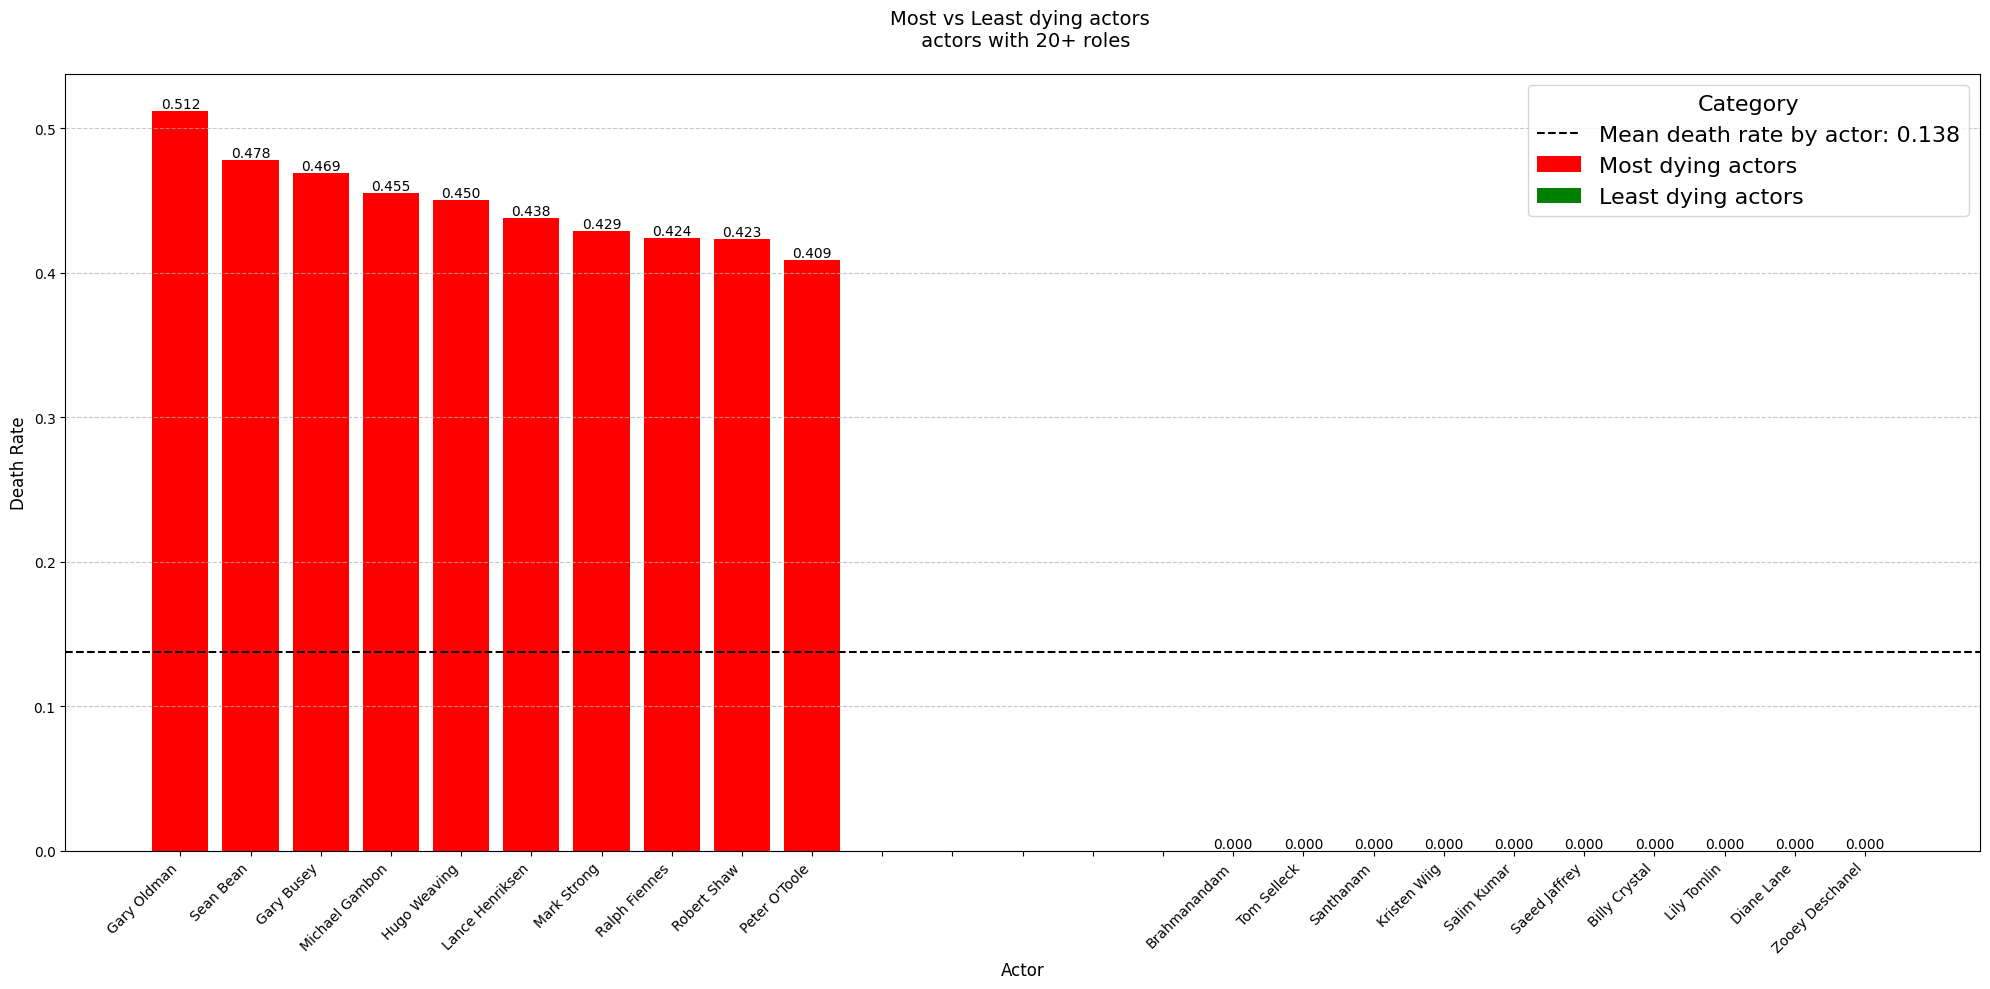


Overall mortality rate: 0.138

Top 10 most dying actors:
                 total_characters  total_deaths  death_rate
actor_name                                                 
Gary Oldman                    41          21.0       0.512
Sean Bean                      23          11.0       0.478
Gary Busey                     32          15.0       0.469
Michael Gambon                 22          10.0       0.455
Hugo Weaving                   20           9.0       0.450
Lance Henriksen                32          14.0       0.438
Mark Strong                    28          12.0       0.429
Ralph Fiennes                  33          14.0       0.424
Robert Shaw                    26          11.0       0.423
Peter O'Toole                  22           9.0       0.409

Top 10 least dying actors:
                 total_characters  total_deaths  death_rate
actor_name                                                 
Brahmanandam                   53           0.0         0.0
Tom Selleck   

In [15]:
mortality_by_actor = df_actors.groupby('actor_name').agg({
    'died': ['count', 'sum', 'mean']
}).round(3)
mortality_by_actor.columns = ['total_characters', 'total_deaths', 'death_rate']

roles_threshold = 20
significant_actor_mortality = mortality_by_actor[mortality_by_actor['total_characters'] >= roles_threshold]
significant_actor_mortality = significant_actor_mortality.sort_values('death_rate', ascending=False)

shown_number = 10
top_ = significant_actor_mortality.head(shown_number).reset_index()
bottom_ = significant_actor_mortality.tail(shown_number).reset_index()

plt.figure(figsize=(20, 10))

positions = np.concatenate([
    np.arange(shown_number),
    np.arange(shown_number + 5, 2 * shown_number + 5)
])
plt.bar(positions[:shown_number], top_['death_rate'], color='red', label='Most dying actors')
plt.bar(positions[shown_number:], bottom_['death_rate'], color='green', label='Least dying actors')

plt.title(f'Most vs Least dying actors \n actors with {roles_threshold}+ roles', 
          pad=20, fontsize=14)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)

mean_death_rate = significant_actor_mortality['death_rate'].mean()
plt.axhline(y=mean_death_rate, color='black', linestyle='--', 
            label=f'Mean death rate by actor: {mean_death_rate:.3f}')

all_labels = list(top_['actor_name']) + [''] * 5 + list(bottom_['actor_name'])
plt.xticks(np.arange(len(all_labels)), all_labels, rotation=45, ha='right')

for i, v in enumerate(top_['death_rate']):
    plt.text(positions[i], v, f'{v:.3f}', ha='center', va='bottom')    
for i, v in enumerate(bottom_['death_rate']):
    plt.text(positions[i + shown_number], v, f'{v:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Category', fontsize=16, title_fontsize=16)
plt.tight_layout()
plt.show()

print(f'\nOverall mortality rate: {mean_death_rate:.3f}')
print(f'\nTop {shown_number} most dying actors:')
print(significant_actor_mortality.head(shown_number).to_string())
print(f'\nTop {shown_number} least dying actors:')
print(significant_actor_mortality.tail(shown_number).to_string())

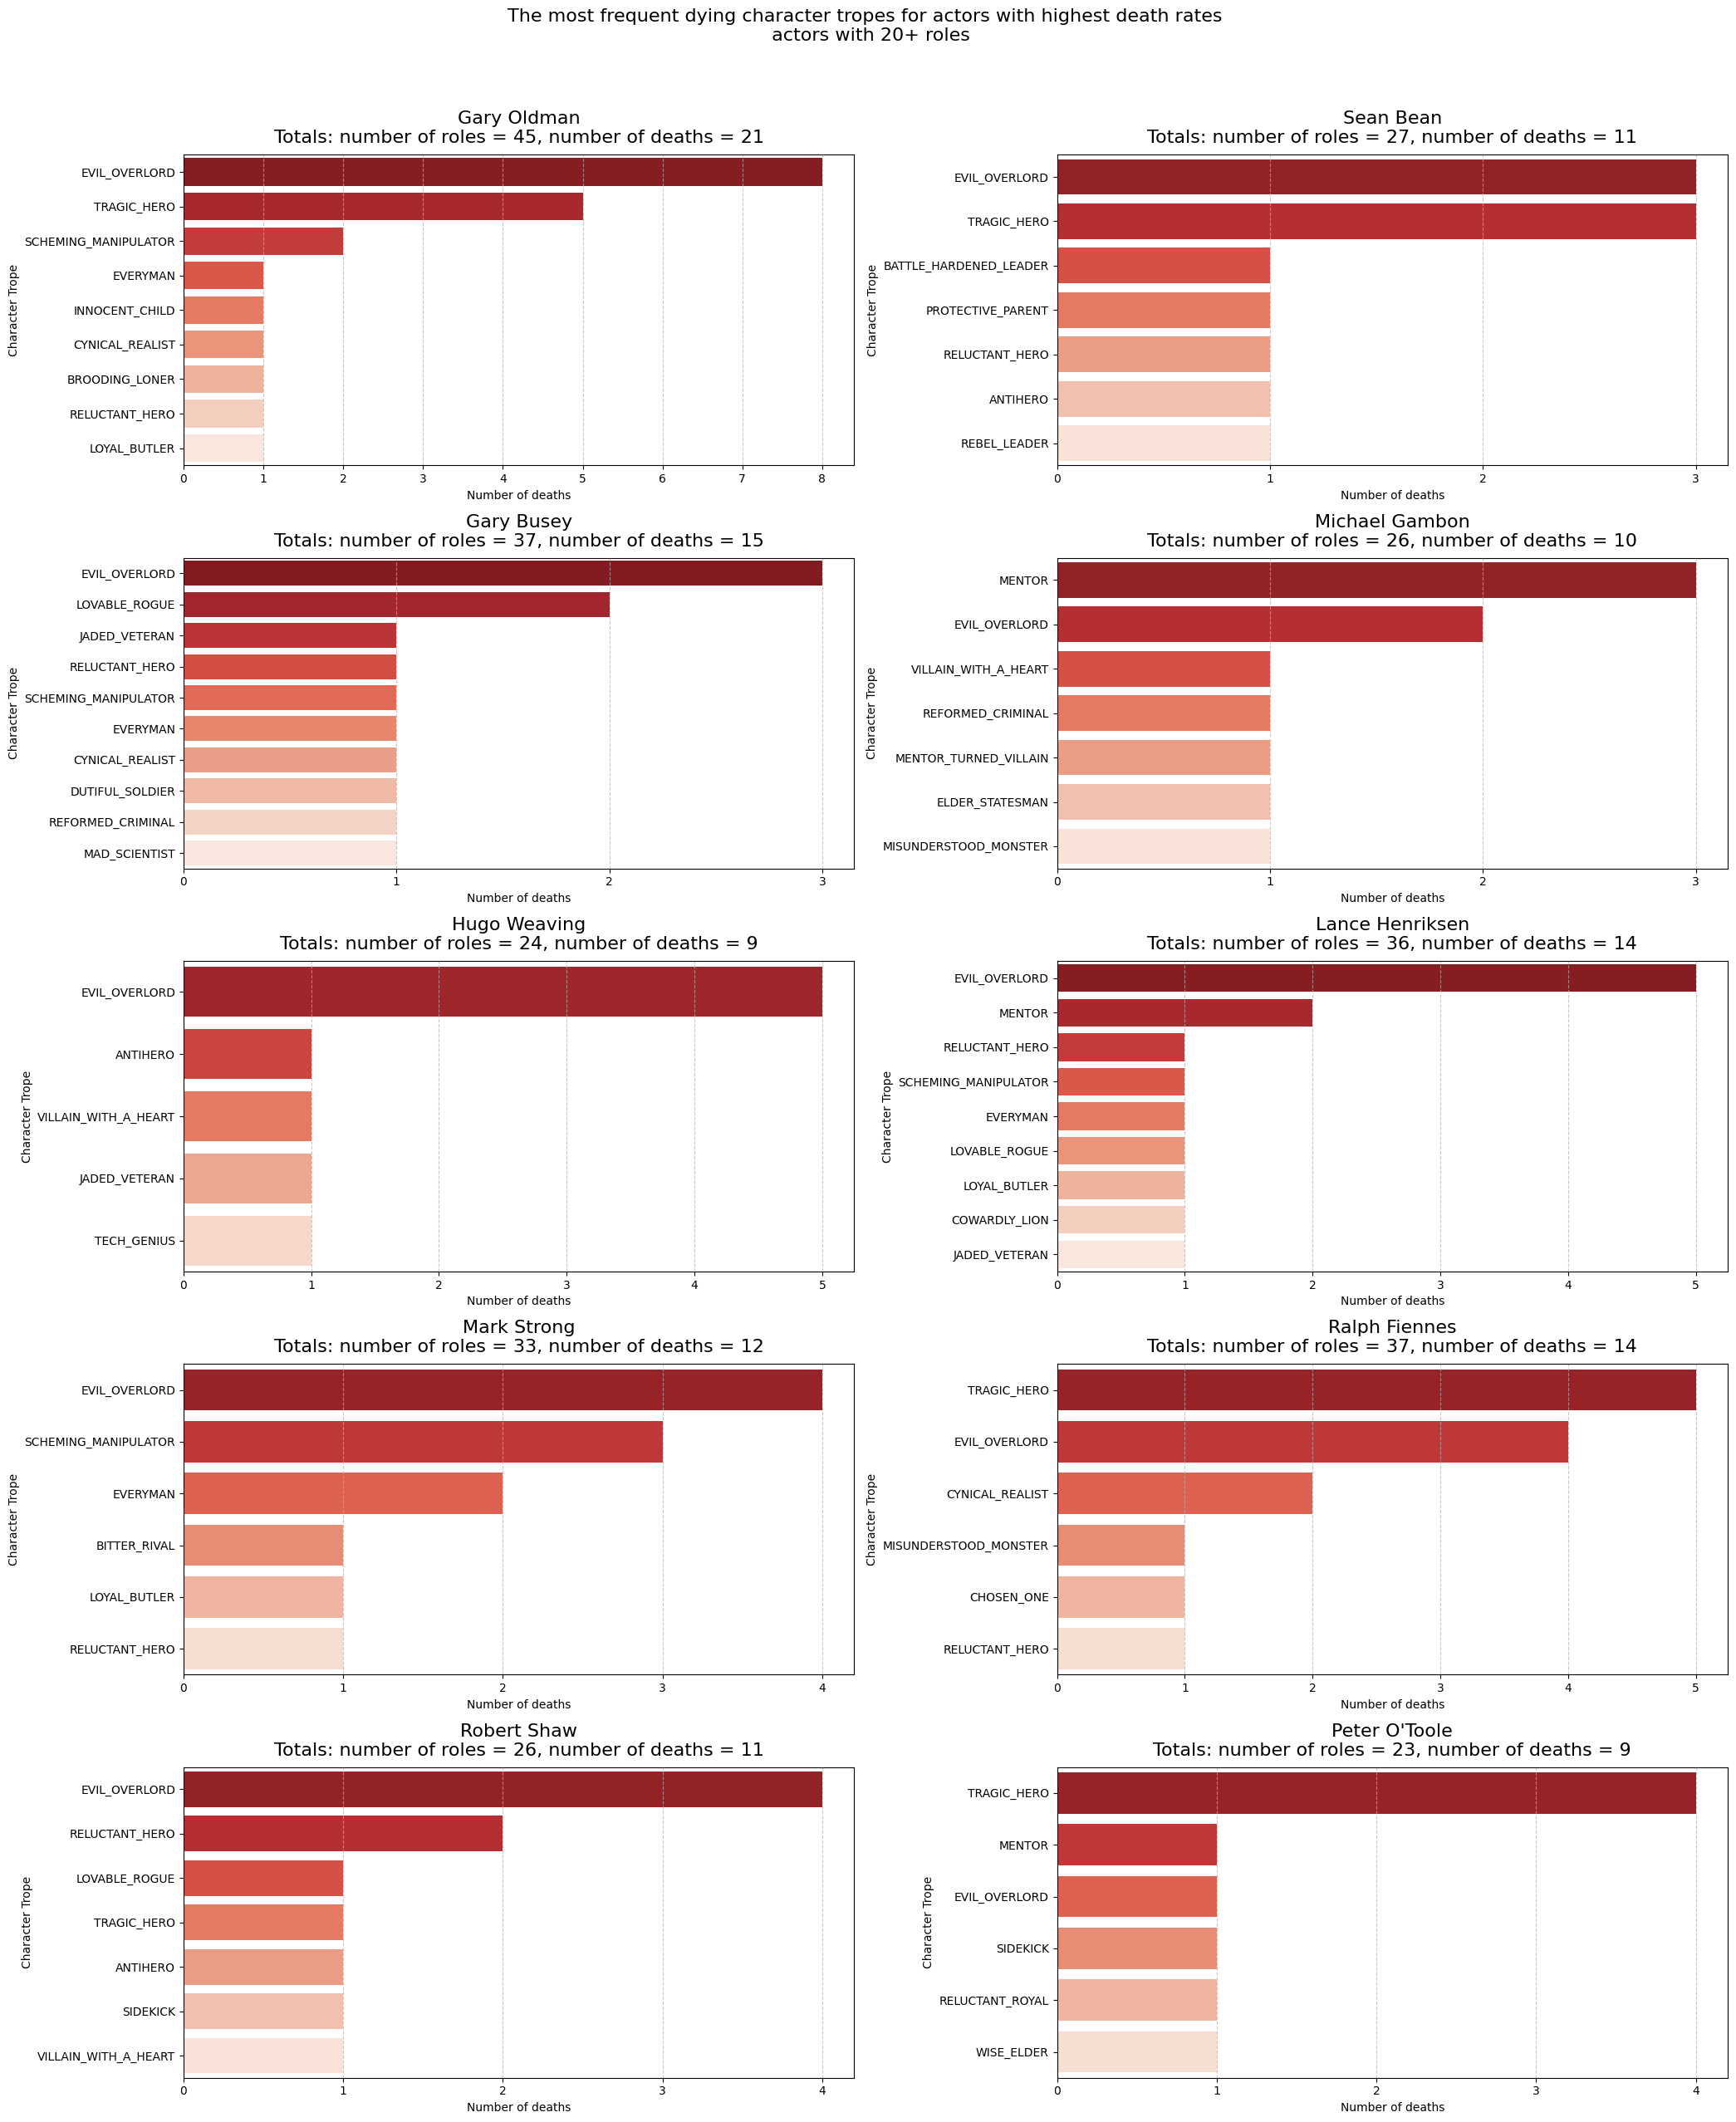


Detailed breakdown of deaths by trope for actors with highest death rates:

Gary Oldman:
Totals: number of roles = 45, number of deaths = 21
                      Total roles  Number of deaths  Death rate  \
trope_id                                                          
EVIL_OVERLORD                  10                 8        80.0   
TRAGIC_HERO                     6                 5        83.3   
SCHEMING_MANIPULATOR            3                 2        66.7   
EVERYMAN                        4                 1        25.0   
INNOCENT_CHILD                  1                 1       100.0   
CYNICAL_REALIST                 1                 1       100.0   
BROODING_LONER                  3                 1        33.3   
RELUCTANT_HERO                  4                 1        25.0   
LOYAL_BUTLER                    1                 1       100.0   

                      Percentage of actor deaths  
trope_id                                          
EVIL_OVERLORD     

In [16]:
top_dying_actors = significant_actor_mortality.head(10).index

fig, axes = plt.subplots(5, 2, figsize=(21, 25))
axes = axes.flatten()

for idx, actor in enumerate(top_dying_actors):
    actor_chars = df_actors[df_actors['actor_name'] == actor]
    total_chars = len(actor_chars)

    actor_deaths = df_actors[
        (df_actors['actor_name'] == actor) & 
        (df_actors['died'] == 1.0)
    ]
    
    trope_deaths = actor_deaths['trope_id'].value_counts().head(10)
    total_deaths = actor_deaths['trope_id'].count()
    
    sns.barplot(
        x=trope_deaths.values,
        y=trope_deaths.index,
        ax=axes[idx],
        palette='Reds_r'
    )
    axes[idx].grid(axis='x', linestyle='--', alpha=0.7)
    axes[idx].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[idx].set_title(f'{actor}\nTotals: number of roles = {total_chars}, number of deaths = {total_deaths}', 
                       pad=10, fontsize=16)
    axes[idx].set_xlabel('Number of deaths')
    axes[idx].set_ylabel('Character Trope')
    
    # for i, v in enumerate(trope_deaths):
    #     axes[idx].text(v, i, f'{v}', va='center')

plt.suptitle(f'The most frequent dying character tropes for actors with highest death rates \n actors with {roles_threshold}+ roles', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print('\nDetailed breakdown of deaths by trope for actors with highest death rates:')
for actor in top_dying_actors:
    print(f'\n{actor}:')
    actor_chars = df_actors[df_actors['actor_name'] == actor]
    total_chars = len(actor_chars)
    
    actor_deaths = actor_chars[actor_chars['died'] == 1.0]
    
    trope_deaths = actor_deaths['trope_id'].value_counts().head(10)
    total_deaths = actor_deaths['trope_id'].count()
    
    trope_totals = actor_chars['trope_id'].value_counts()
    
    stats_df = pd.DataFrame({
        'Total roles': trope_totals[trope_deaths.index],
        'Number of deaths': trope_deaths,
        'Death rate': (trope_deaths / trope_totals[trope_deaths.index] * 100).round(1),
        'Percentage of actor deaths': (trope_deaths / total_deaths * 100).round(1)
    })
    
    print(f'Totals: number of roles = {total_chars}, number of deaths = {total_deaths}')
    print(stats_df)